<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png?sfvrsn=764583a6_19'"></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 - Heng Jue Wei Tevin (S10260014E) </h2></th>
    </tr>
</table>

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import requests
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import time
import scipy.stats as stats
from feature_engine.imputation import MeanMedianImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import CountFrequencyEncoder
import statsmodels.api as sm
from sklearn import tree

### Loading of Datasets

In [4]:
results = pd.read_csv("./f1db_csv_mod/results_mod.csv")
qualifying = pd.read_csv("./f1db_csv_mod/qualifying_mod.csv")
constructors = pd.read_csv("./f1db_csv_mod/constructors_mod.csv")
races = pd.read_csv("./f1db_csv_mod/races_mod.csv")
circuits = pd.read_csv("./f1db_csv_mod/circuits_mod.csv")
drivers = pd.read_csv("./f1db_csv_mod/drivers_mod.csv")
driver_standings = pd.read_csv("./f1db_csv_mod/driver_standings_mod.csv")
constructor_standings = pd.read_csv("./f1db_csv_mod/constructor_standings_mod.csv")

#### Results

In [6]:
print(results.info())
print(results)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

#### Qualifying

In [8]:
print(qualifying.info())
print(qualifying)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB
None
      qualifyId  raceId  driverId  constructorId  number  position        q1  \
0             1      18         1              1      22         1  1:26.572   
1             2      18         9              2       4         2  1:26.103   
2             3      18         5              1      23         3  1:25.664   
3             4      18        13           

#### Constructors

In [10]:
print(constructors.info())
print(constructors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB
None
     constructorId constructorRef            name nationality  \
0                1        mclaren         McLaren     British   
1                2     bmw_sauber      BMW Sauber      German   
2                3       williams        Williams     British   
3                4        renault         Renault      French   
4                5     toro_rosso      Toro Rosso     Italian   
..             ...            ...             ...         ...   
206            209          manor  Manor Marussia     British   
207          

#### Races

In [12]:
print(races.info())
print(races)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB
None
      raceId  round  circuitId                      name        date  \
0          1      1          1     Australian Grand Prix   3/29/2009   
1          2      2          2      Malaysian Grand Prix   4/5/12009   
2          3      3         17        Chinese Grand Prix   4/19/2009   
3          4      4          3        Bahrain Grand Prix   4/26/2009   
4          5      5          4        Spanish Grand Prix   5/10/2009   
...      ...    ...        ...                       ..

#### Circuits

In [14]:
print(circuits.info())
print(circuits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB
None
    circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul              

#### Drivers

In [16]:
print(drivers.info())
print(drivers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB
None
     driverId        driverRef number code  forename     surname         dob  \
0           1         hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1           2         heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2           3          rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3           4           alonso     14  ALO  Fernando      Alonso  198

#### Driver Standings

In [18]:
print(driver_standings.info())
print(driver_standings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33394 entries, 0 to 33393
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   driverStandingsId  33394 non-null  int64 
 1   raceId             33394 non-null  int64 
 2   driverId           33394 non-null  int64 
 3   points             33389 non-null  object
 4   position           33394 non-null  int64 
 5   positionText       33394 non-null  object
 6   wins               33394 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
None
       driverStandingsId  raceId  driverId points  position positionText  wins
0                      1      18         1     10         1            1     1
1                      2      18         2      8         2            2     0
2                      3      18         3      6         3            3     0
3                      4      18         4      5         4            4     0
4                  

#### Constructor Standings

In [20]:
print(constructor_standings.info())
print(constructor_standings)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB
None
       constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18             

### Merging Of Datasets

In [22]:
for i, each in enumerate(races['date']):
    parts = str(each).split("/")
    if parts[0] == 'nan':
        races.loc[i, 'date'] = 'nan'
    else:
        if len(parts[2]) == 5 and parts[2].startswith("1"):
            parts[2] = parts[2][1:]  # Remove extra "1"
        races.loc[i, 'date'] = "/".join(parts)

races["date"] = pd.to_datetime(races["date"], format="%m/%d/%Y")
races['year'] = races['date'].dt.year
df = results.merge(qualifying, on=["raceId", "driverId", "constructorId"], how="left")
df = df.merge(races[["raceId", "circuitId", "year", "round", "date", "time"]], on="raceId", how="left")
df = df.merge(circuits[["circuitId", "alt", "location"]], on="circuitId", how="left")
df = df.merge(constructors[["constructorId", "nationality", "name"]], on="constructorId", how="left")
df = df.merge(drivers[['driverId', 'dob']], on='driverId', how='left')

# Map each (year, round) to the previous round to get pre-race standings
prev_round = races[['raceId','year','round']].assign(prev_round=lambda d: d['round']-1)
prev_round = prev_round.merge(races[['raceId','year','round']].rename(columns={'raceId':'prev_raceId','round':'prev_round'}),
                              on=['year','prev_round'], how='left').drop(columns='prev_round')

# Join prev driver standings (season-to-date BEFORE this race)
ds_prev = driver_standings[['raceId','driverId','position','wins','points']]\
            .rename(columns={'raceId':'prev_raceId','position':'drv_pos_s2d','wins':'drv_wins_s2d', 'points':'drv_pts_s2d'})
df = df.merge(prev_round[['raceId','prev_raceId']], on='raceId', how='left')\
           .merge(ds_prev, on=['prev_raceId','driverId'], how='left')

# Join prev constructor standings
cs_prev = constructor_standings[['raceId','constructorId','position','wins','points']]\
            .rename(columns={'raceId':'prev_raceId','position':'team_pos_s2d','wins':'team_wins_s2d','points':'team_pts_s2d'})
df = df.merge(cs_prev, on=['prev_raceId','constructorId'], how='left')


### Feature Engineering (Adding More Columns)

In [24]:
df['drv_pts_s2d'] = pd.to_numeric(df['drv_pts_s2d'], errors='coerce')
df['month'] = df['date'].dt.month
df['start_hour'] = pd.to_datetime(df['time_y'], format='%H:%M:%S', errors='coerce').dt.hour
df['is_night_race'] = df['start_hour'].apply(lambda x: 1 if x >= 18 else 0)

# Driver average points per circuit
drv_circuit_perf = df.groupby(['driverId', 'circuitId'])['points'].mean().reset_index()
drv_circuit_perf.rename(columns={'points': 'drv_avg_pts_circuit'}, inplace=True)

# Team average points per circuit
team_circuit_perf = df.groupby(['constructorId', 'circuitId'])['points'].mean().reset_index()
team_circuit_perf.rename(columns={'points': 'team_avg_pts_circuit'}, inplace=True)

# Merge into main dataset
df = df.merge(drv_circuit_perf, on=['driverId', 'circuitId'], how='left')\
       .merge(team_circuit_perf, on=['constructorId', 'circuitId'], how='left')

df['drv_pts_momentum'] = df['drv_pts_s2d'] / df['prev_raceId']  # avg pts per race so far
df['team_pts_momentum'] = df['team_pts_s2d'] / df['prev_raceId']
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
df['driver_age'] = (df['date'] - df['dob']).dt.days // 365
df.drop('dob', axis=1, inplace=True)
df['alt'] = pd.to_numeric(df['alt'], errors='coerce')
df.replace('\\N', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   resultId              25399 non-null  int64         
 1   raceId                25399 non-null  int64         
 2   driverId              25399 non-null  int64         
 3   constructorId         25399 non-null  int64         
 4   number_x              25393 non-null  object        
 5   grid                  25399 non-null  int64         
 6   position_x            14613 non-null  object        
 7   positionText          25399 non-null  object        
 8   positionOrder         25399 non-null  int64         
 9   points                25399 non-null  float64       
 10  laps                  25399 non-null  int64         
 11  time_x                6809 non-null   object        
 12  milliseconds          6808 non-null   object        
 13  fastestLap      

### Renaming and Dropping Columns

In [26]:
df['constructor_name'] = df['name']
df['constructor_nationality'] = df['nationality']

In [27]:
df = df.drop(columns=['resultId', 
                      'raceId', 
                      'driverId', 
                      'constructorId',
                      'statusId',
                      'qualifyId',
                      'circuitId',
                      'number_x' ,
                      'position_x', 
                      'positionText', 
                      'positionOrder',
                      'laps',
                      'time_x',
                      'milliseconds',
                      'fastestLap',
                      'fastestLapTime',
                      'fastestLapSpeed',
                      'number_y',
                      'position_y',
                      'q1',
                      'q2',
                      'q3',
                      'date',
                      'time_y',
                      'nationality',
                      'name',
                      'prev_raceId',
                      'rank',
                      'start_hour',
                      'alt',
                      'round',
                      'month'
                     ])

# Keep only races from 2011 onwards
df_modern = df[df['year'] >= 2011].copy()

print(f"Original dataset size: {df.shape[0]}")
print(f"Modern era dataset size: {df_modern.shape[0]}")

points_col = df_modern.pop('points')  # Removes and stores the column
df_modern['points'] = points_col
df = df_modern

Original dataset size: 25399
Modern era dataset size: 4476


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4476 entries, 20776 to 25398
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     4476 non-null   int64  
 1   year                     4476 non-null   float64
 2   location                 4476 non-null   object 
 3   drv_pos_s2d              4117 non-null   float64
 4   drv_wins_s2d             4117 non-null   float64
 5   drv_pts_s2d              4109 non-null   float64
 6   team_pos_s2d             4134 non-null   float64
 7   team_wins_s2d            4134 non-null   float64
 8   team_pts_s2d             4134 non-null   float64
 9   is_night_race            4476 non-null   int64  
 10  drv_avg_pts_circuit      4476 non-null   float64
 11  team_avg_pts_circuit     4476 non-null   float64
 12  drv_pts_momentum         4109 non-null   float64
 13  team_pts_momentum        4134 non-null   float64
 14  driver_age              

### Final Dataframe

In [30]:
df

,grid,year,location,drv_pos_s2d,drv_wins_s2d,drv_pts_s2d,team_pos_s2d,team_wins_s2d,team_pts_s2d,is_night_race,drv_avg_pts_circuit,team_avg_pts_circuit,drv_pts_momentum,team_pts_momentum,driver_age,constructor_name,constructor_nationality,points
20776,1,2011.0,Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,0,12.500000,5.433333,NaN,NaN,23.0,Red Bull,Austrian,25.0
20777,2,2011.0,Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,0,12.615385,5.104167,NaN,NaN,26.0,McLaren,British,18.0
20778,6,2011.0,Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,0,5.000000,3.678571,NaN,NaN,26.0,Renault,French,15.0
20779,5,2011.0,Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,0,7.187500,7.083333,NaN,NaN,29.0,Ferrari,Italian,12.0
20780,3,2011.0,Melbourne,NaN,NaN,NaN,NaN,NaN,NaN,0,3.166667,5.433333,NaN,NaN,34.0,Red Bull,Austrian,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,4,2021.0,Abu Dhabi,4.0,1.0,190.0,2.0,10.0,559.5,0,4.000000,11.769231,0.177239,0.521922,31.0,Red Bull,Austrian,0.0
25395,16,2021.0,Abu Dhabi,17.0,0.0,7.0,8.0,0.0,23.0,0,0.000000,3.346154,0.006530,0.021455,26.0,Williams,British,0.0
25396,14,2021.0,Abu Dhabi,18.0,0.0,3.0,9.0,0.0,13.0,0,0.000000,0.000000,0.002799,0.012127,28.0,Alfa Romeo,Swiss,0.0
25397,17,2021.0,Abu Dhabi,15.0,0.0,16.0,8.0,0.0,23.0,0,0.000000,3.346154,0.014925,0.021455,23.0,Williams,British,0.0


### Checking for Missing Values

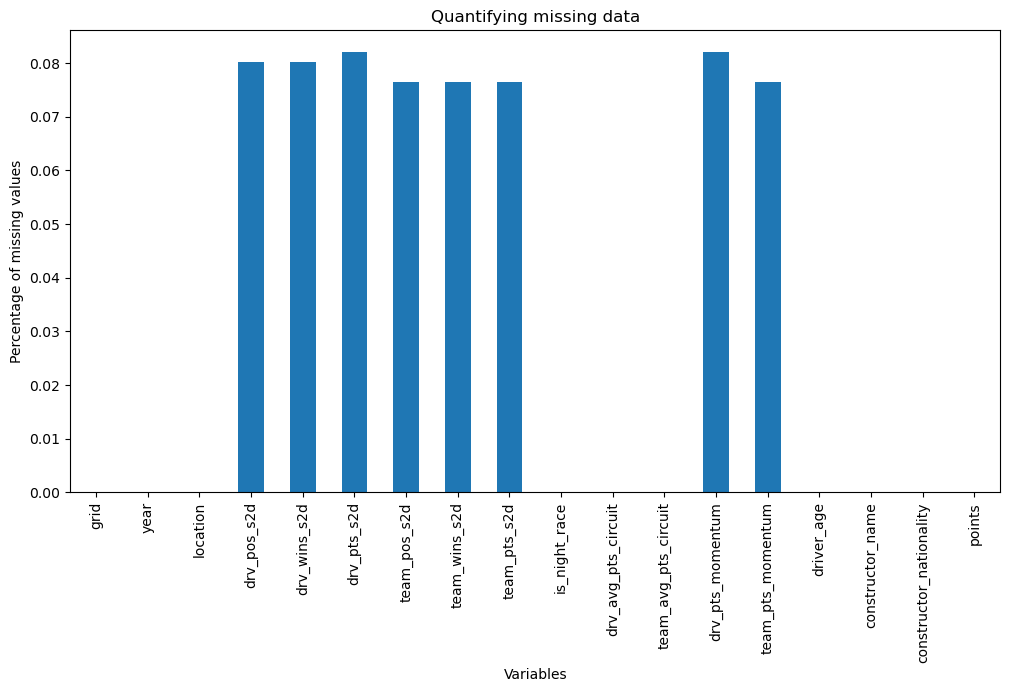

grid                         0
year                         0
location                     0
drv_pos_s2d                359
drv_wins_s2d               359
drv_pts_s2d                367
team_pos_s2d               342
team_wins_s2d              342
team_pts_s2d               342
is_night_race                0
drv_avg_pts_circuit          0
team_avg_pts_circuit         0
drv_pts_momentum           367
team_pts_momentum          342
driver_age                   0
constructor_name             0
constructor_nationality      0
points                       0
dtype: int64


In [32]:
#Checking for missing values
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent.sort_values(ascending=False)

df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()
print(df.isnull().sum())

### Data Cleaning & Transformation

In [34]:
y = df["points"]
df = df.drop(columns=['points'])
X = df.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

X_train.shape, X_test.shape

((3580, 17), (896, 17))

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3580 entries, 23360 to 24732
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     3580 non-null   int64  
 1   year                     3580 non-null   float64
 2   location                 3580 non-null   object 
 3   drv_pos_s2d              3302 non-null   float64
 4   drv_wins_s2d             3302 non-null   float64
 5   drv_pts_s2d              3296 non-null   float64
 6   team_pos_s2d             3313 non-null   float64
 7   team_wins_s2d            3313 non-null   float64
 8   team_pts_s2d             3313 non-null   float64
 9   is_night_race            3580 non-null   int64  
 10  drv_avg_pts_circuit      3580 non-null   float64
 11  team_avg_pts_circuit     3580 non-null   float64
 12  drv_pts_momentum         3296 non-null   float64
 13  team_pts_momentum        3313 non-null   float64
 14  driver_age              

#### Assigning each Columns to either Numerical or Categorical

In [37]:
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']

#### Filling in Missing Values

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_zero_cols = ['drv_wins_s2d', 'team_wins_s2d', 'drv_pts_momentum', 'team_pts_momentum', 'drv_pts_s2d', 'team_pts_s2d']
ordinal_cols = ['drv_pos_s2d', 'team_pos_s2d']



num_zero_imputer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0))])
ordinal_imputer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent'))])


preprocessor = ColumnTransformer([
    ('num_zero', num_zero_imputer, num_zero_cols),
    ('ordinal', ordinal_imputer, ordinal_cols),
], remainder='passthrough')

preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

imputed_cols = num_zero_cols + ordinal_cols 

# 2. Columns that were passed through (remainder='passthrough')
pass_through_cols = [col for col in X_train.columns if col not in imputed_cols]

# 3. Combine them
final_cols = imputed_cols + pass_through_cols

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_transformed, columns=final_cols, index=X_train.index)
X_test = pd.DataFrame(X_test_transformed, columns=final_cols, index=X_test.index)
for each in num_cols:
    X_train[each] = pd.to_numeric(X_train[each], errors='coerce')
    X_test[each] = pd.to_numeric(X_test[each], errors='coerce')

print(X_train.head())

       drv_wins_s2d  team_wins_s2d  drv_pts_momentum  team_pts_momentum  \
23360           0.0            0.0          0.052740           0.140641   
21848           0.0            2.0          0.050847           0.138983   
23621           0.0            4.0          0.130612           0.355102   
24773           0.0            0.0          0.000000           0.000000   
21359           0.0            0.0          0.025463           0.047454   

       drv_pts_s2d  team_pts_s2d  drv_pos_s2d  team_pos_s2d  grid    year  \
23360         51.0         136.0         11.0           5.0    10  2016.0   
21848         45.0         123.0          7.0           2.0    16  2013.0   
23621        128.0         348.0          5.0           2.0     5  2017.0   
24773          0.0           0.0         20.0          10.0    19  2020.0   
21359         22.0          41.0         10.0           7.0    23  2012.0   

          location  is_night_race  drv_avg_pts_circuit  team_avg_pts_circuit  \
23360 

In [40]:
print("****X_train****")
print(X_train.isnull().sum())
print("****X_test****")
print(X_test.isnull().sum())

****X_train****
drv_wins_s2d               0
team_wins_s2d              0
drv_pts_momentum           0
team_pts_momentum          0
drv_pts_s2d                0
team_pts_s2d               0
drv_pos_s2d                0
team_pos_s2d               0
grid                       0
year                       0
location                   0
is_night_race              0
drv_avg_pts_circuit        0
team_avg_pts_circuit       0
driver_age                 0
constructor_name           0
constructor_nationality    0
dtype: int64
****X_test****
drv_wins_s2d               0
team_wins_s2d              0
drv_pts_momentum           0
team_pts_momentum          0
drv_pts_s2d                0
team_pts_s2d               0
drv_pos_s2d                0
team_pos_s2d               0
grid                       0
year                       0
location                   0
is_night_race              0
drv_avg_pts_circuit        0
team_avg_pts_circuit       0
driver_age                 0
constructor_name           0

### Dealing With Numerical Columns

grid


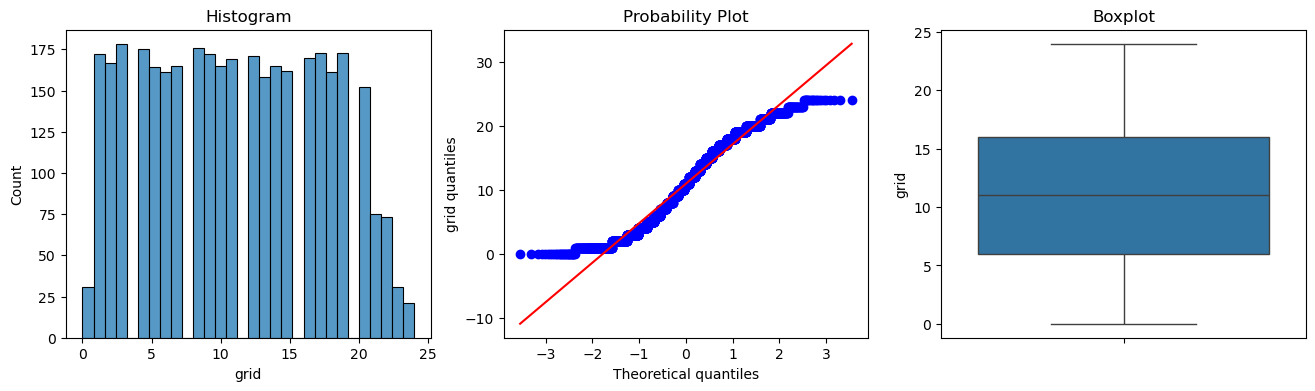

year


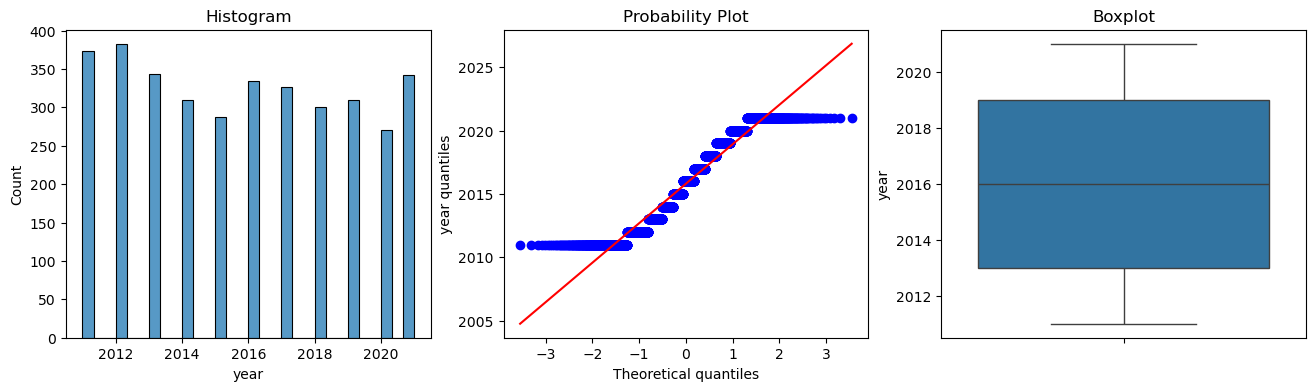

drv_pos_s2d


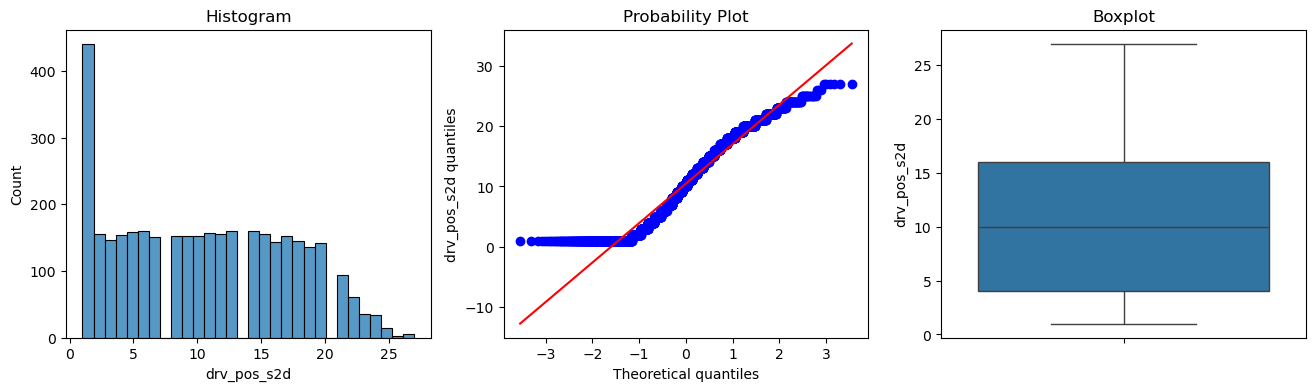

drv_wins_s2d


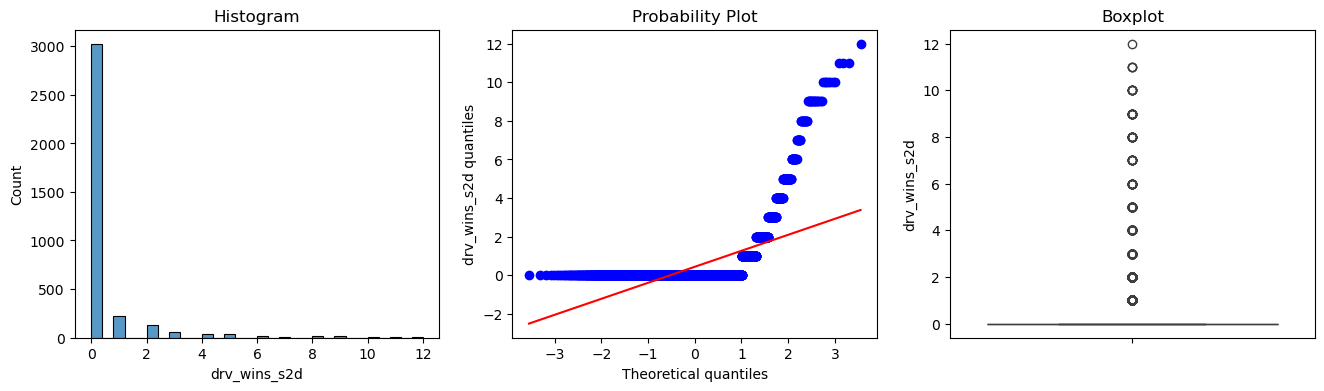

drv_pts_s2d


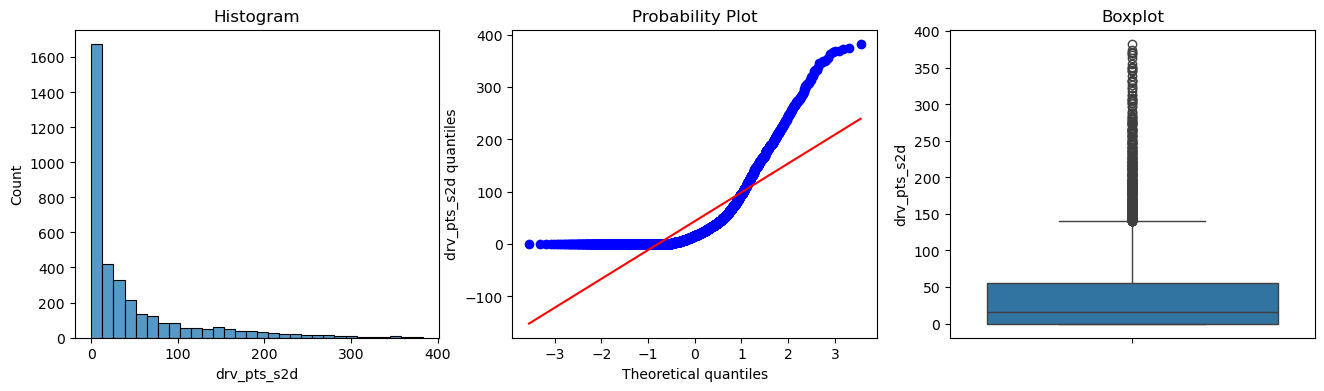

team_pos_s2d


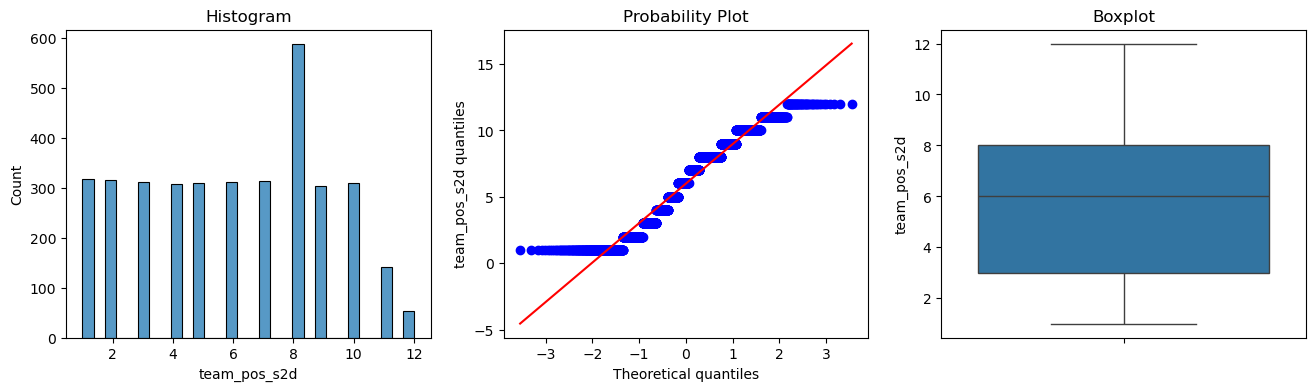

team_wins_s2d


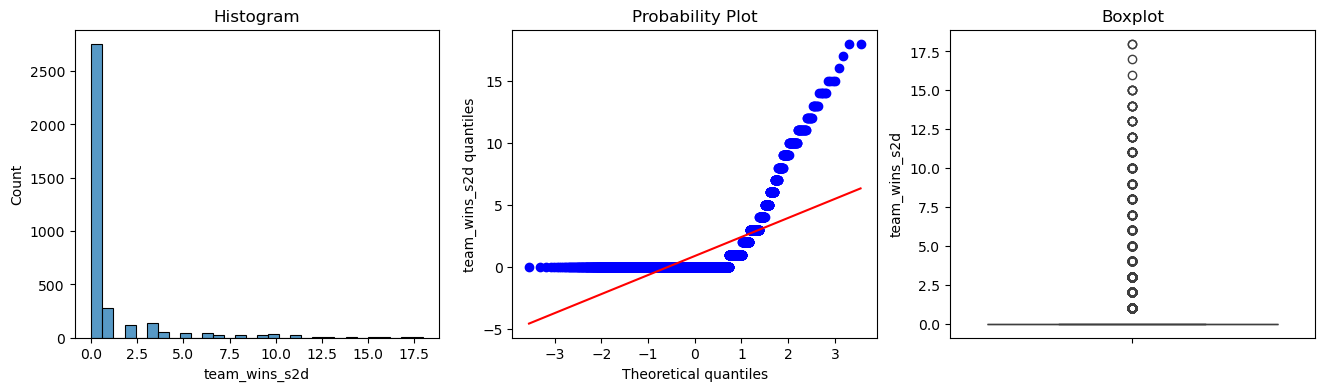

team_pts_s2d


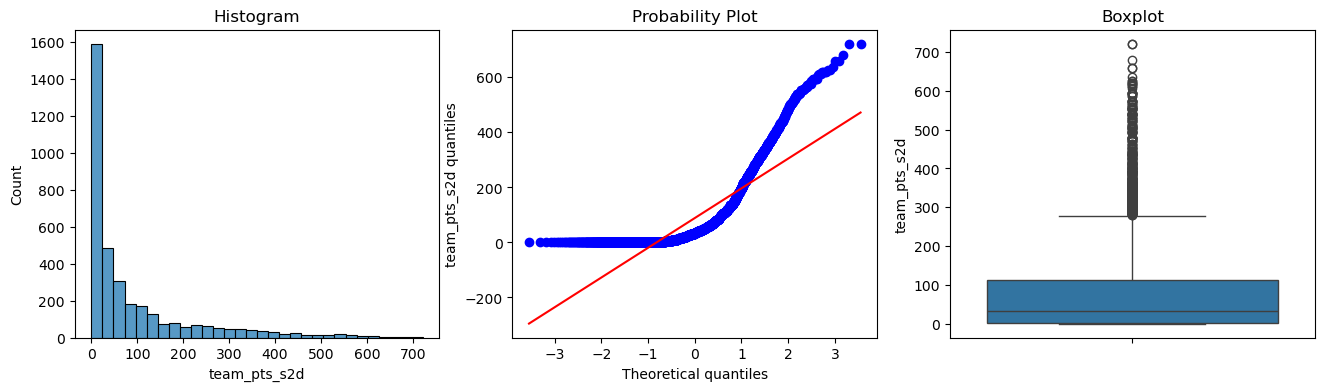

is_night_race


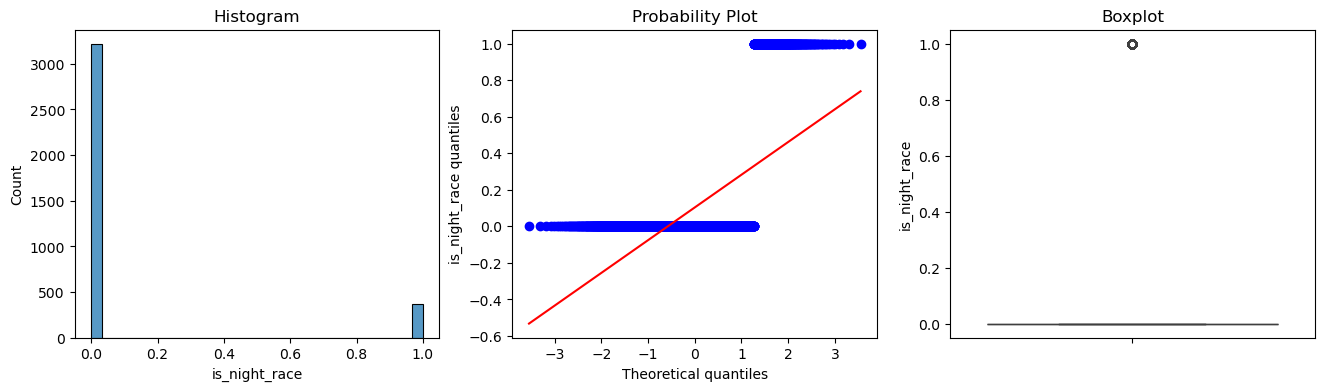

drv_avg_pts_circuit


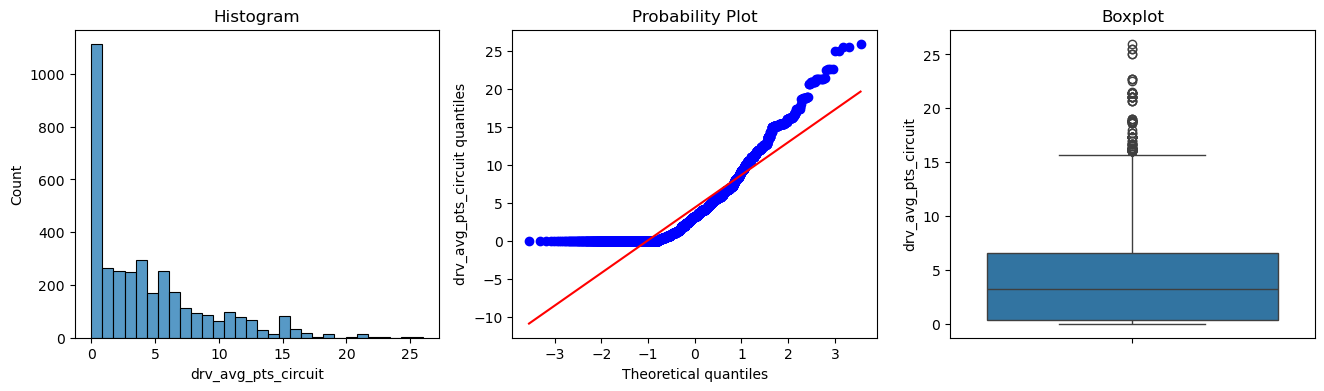

team_avg_pts_circuit


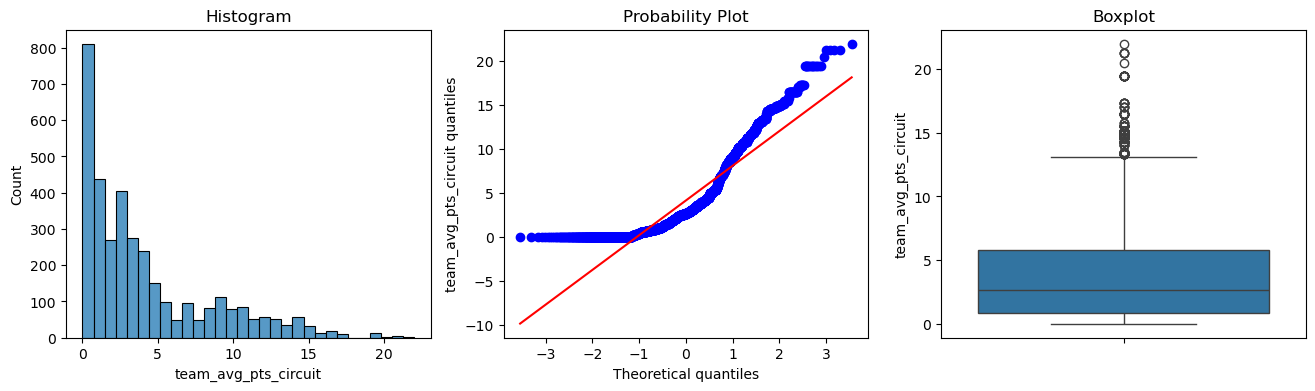

drv_pts_momentum


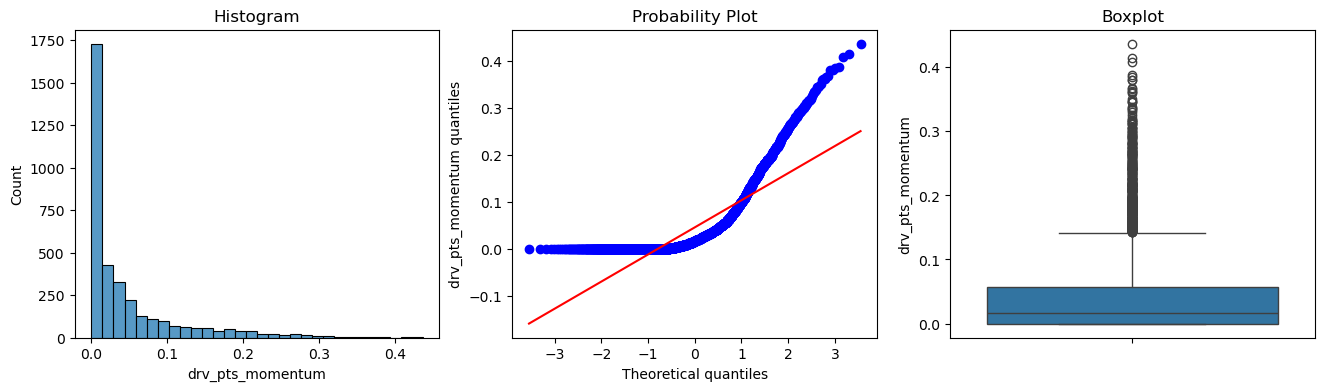

team_pts_momentum


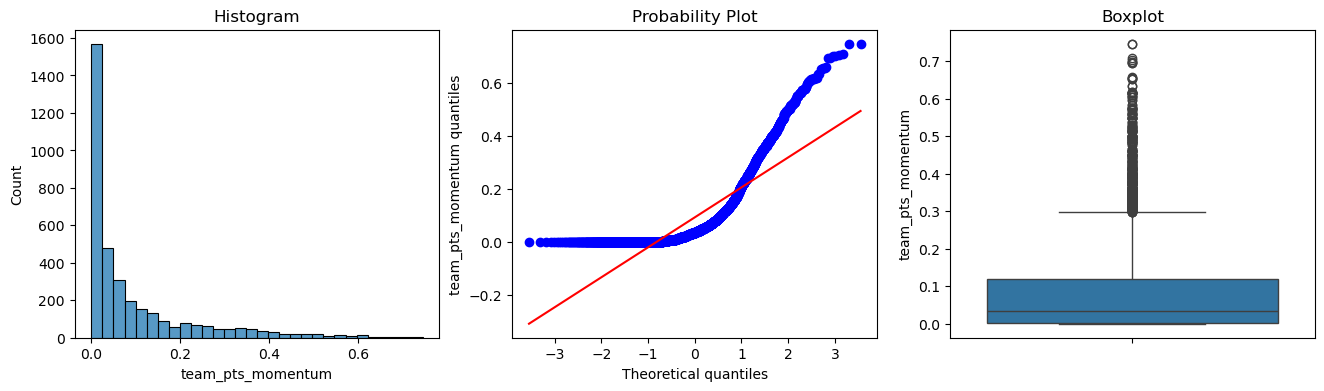

driver_age


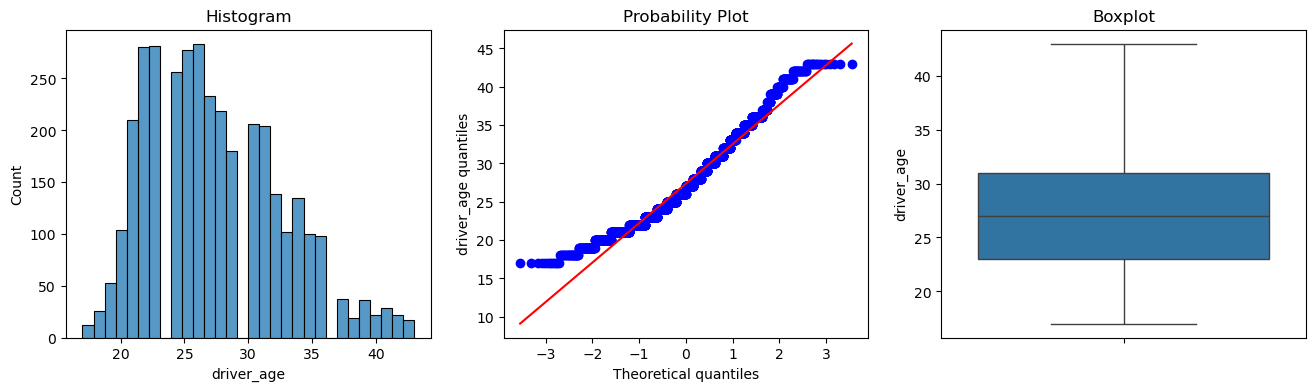

In [42]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel(f'{variable} quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

for each in num_cols:
    print(each)
    diagnostic_plots(X_train, each)

#### Dealing with Outliers

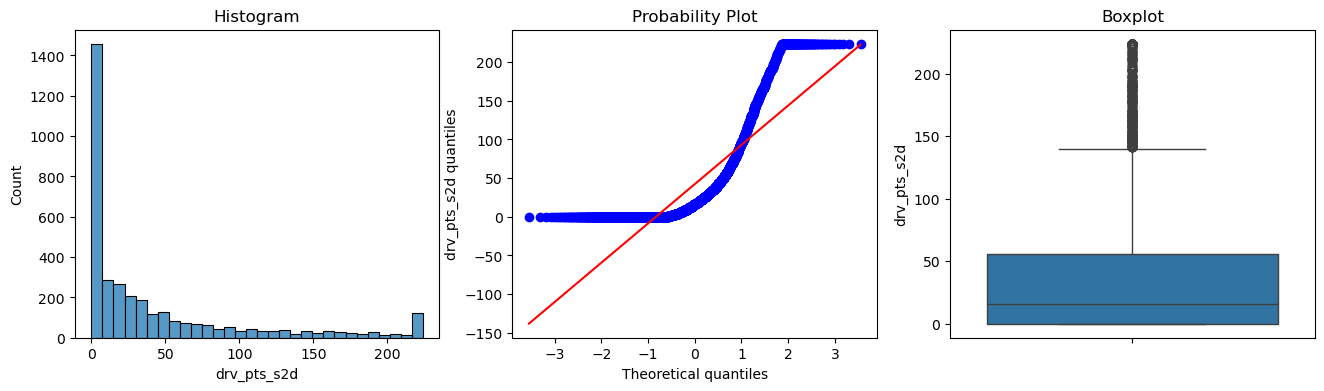

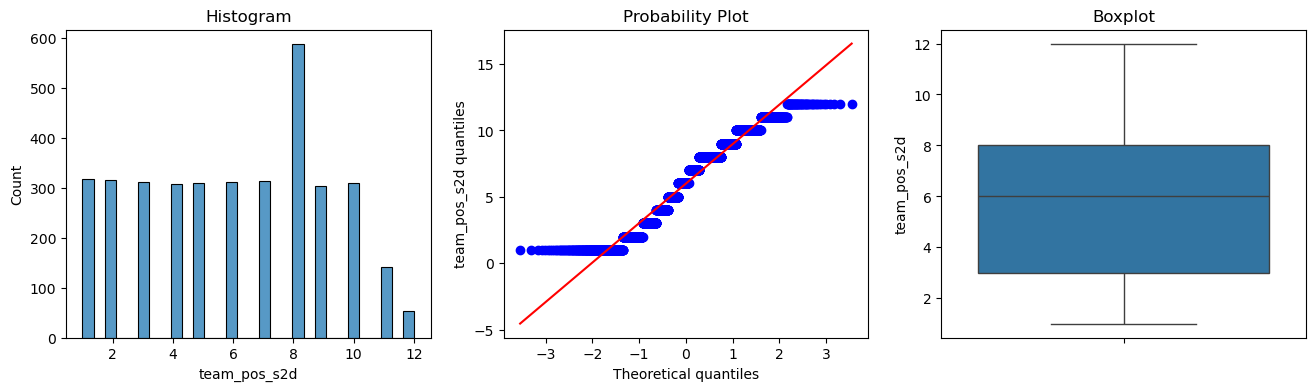

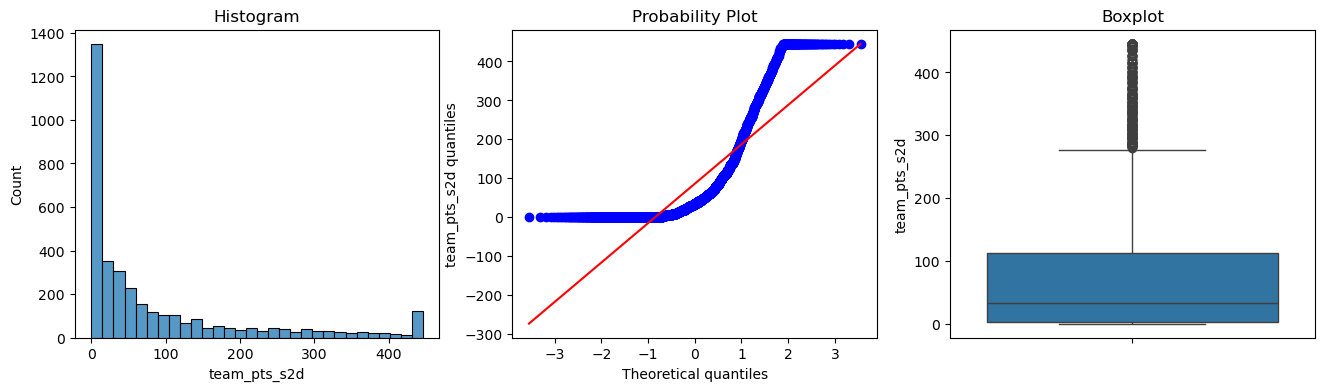

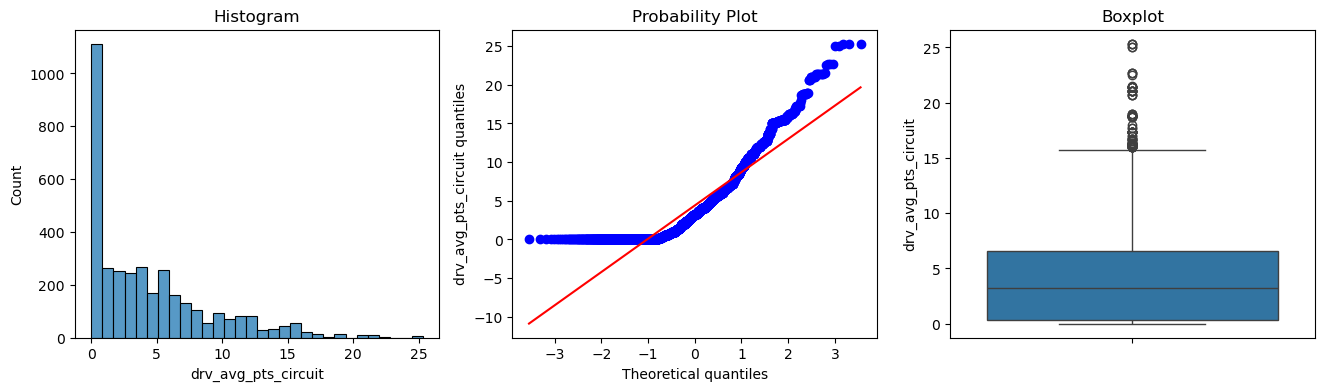

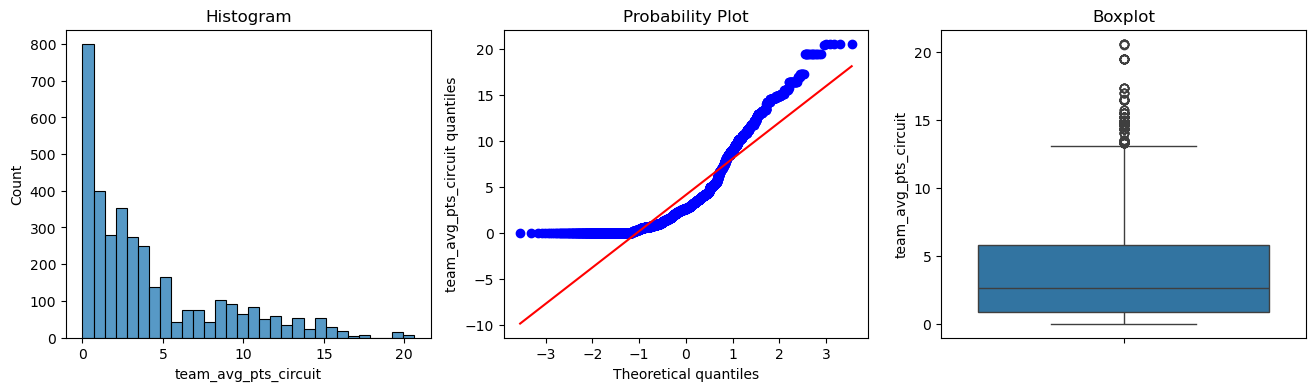

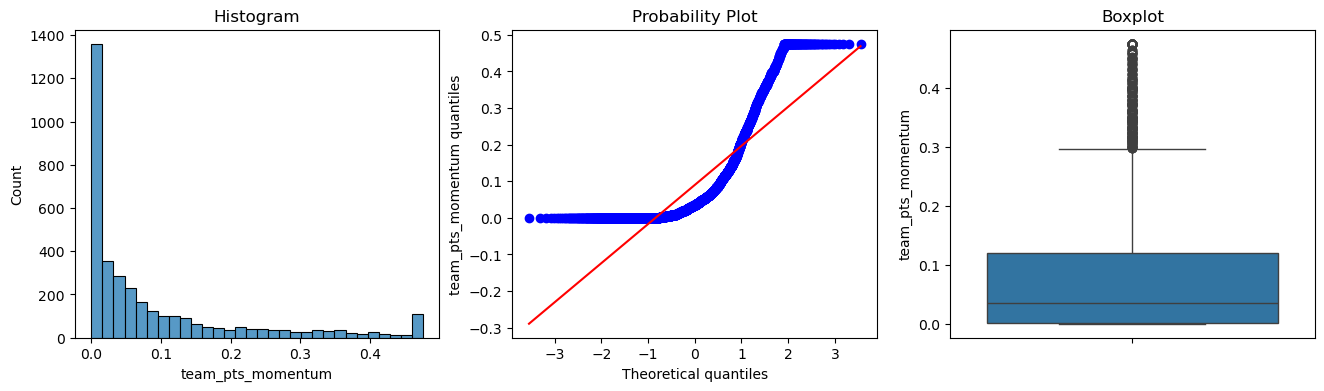

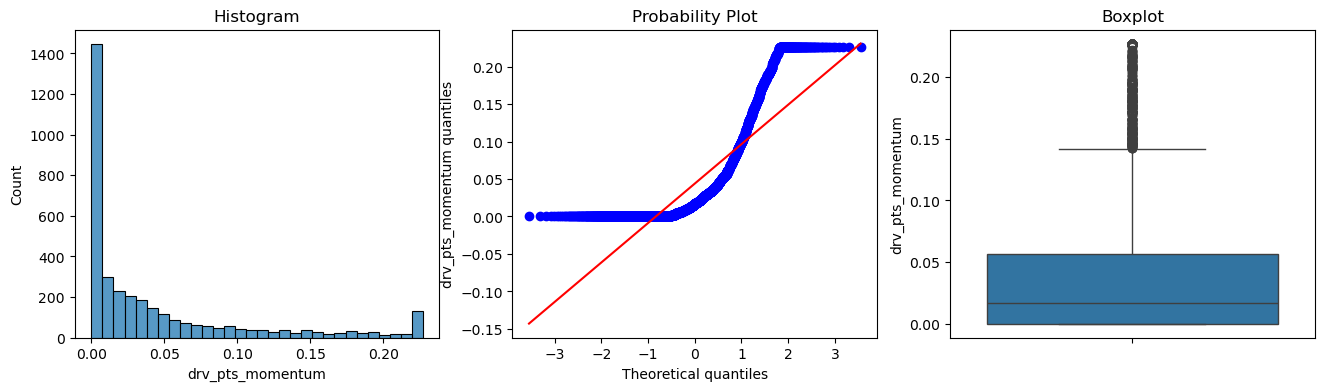

In [44]:
outliers = [
    'drv_pts_s2d',
    'team_pos_s2d',
    'team_pts_s2d',
    'drv_avg_pts_circuit',
    'team_avg_pts_circuit',
    'team_pts_momentum', 
    'drv_pts_momentum'
]
windsorizer = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
                          tail='right', # cap left, right or both tails 
                          fold=3,
                          variables=outliers)

windsorizer.fit(X_train)

X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)
for each in outliers:
    diagnostic_plots(X_train, each)

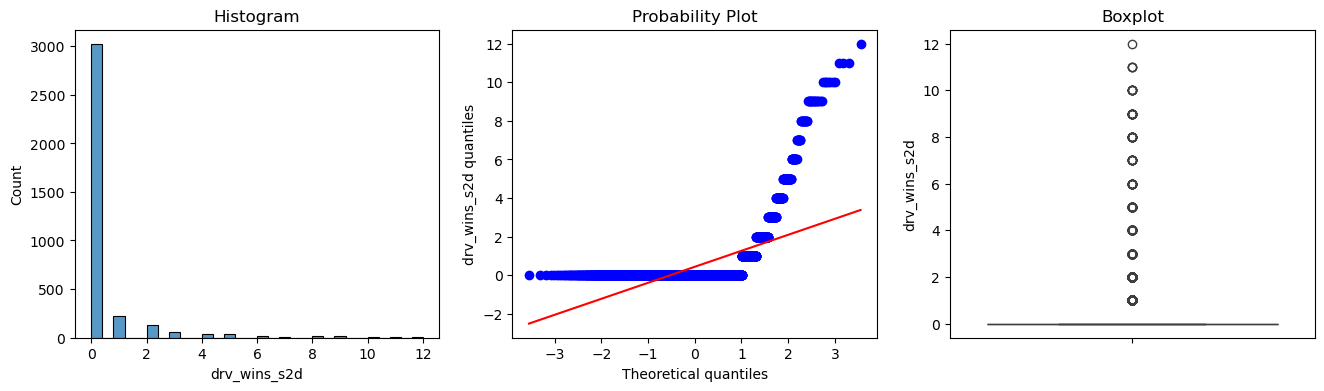

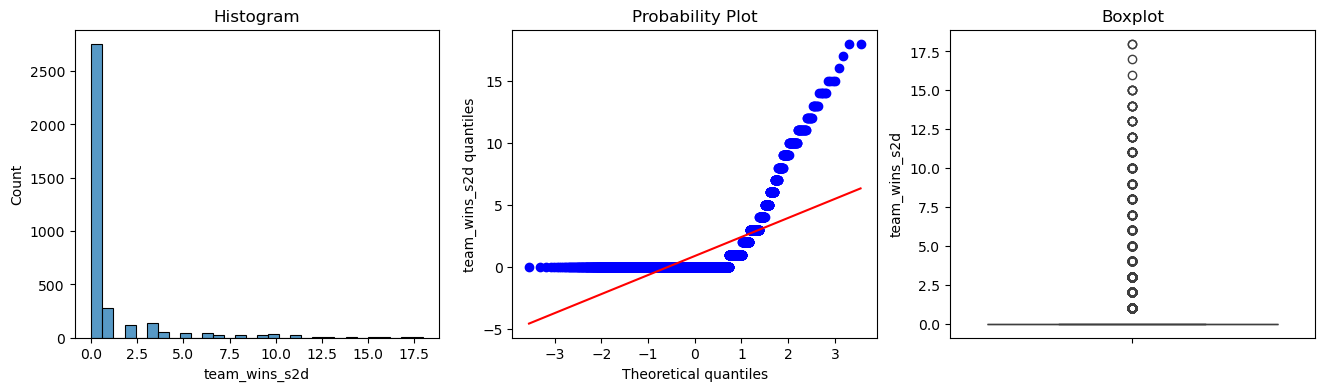

In [45]:
winsorizer = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3, 
    variables=['drv_wins_s2d', 'team_wins_s2d']
)

windsorizer.fit(X_train)
X_train = windsorizer.transform(X_train)
X_test = windsorizer.transform(X_test)
diagnostic_plots(X_train, 'drv_wins_s2d')
diagnostic_plots(X_train, 'team_wins_s2d')

### Data Transformation

#### i) Yeo-Johnson

driver_age


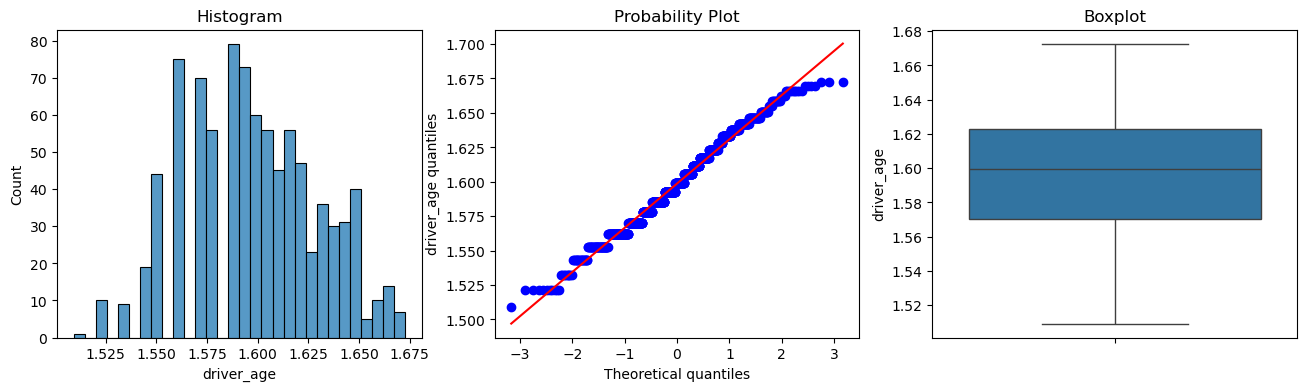

In [48]:
X_train_yjt = X_train.copy()
X_test_yjt = X_test.copy()
skewed = [
    'driver_age',   
]

skewed_train = [f for f in skewed if f in X_train_yjt.columns]
skewed_test = [f for f in skewed if f in X_test_yjt.columns]
yjt = YeoJohnsonTransformer(variables = skewed_train)
X_train_yjt[skewed_train] = yjt.fit_transform(X_train_yjt[skewed_train])
yjt = YeoJohnsonTransformer(variables = skewed_train)
X_test_yjt[skewed_train] = yjt.fit_transform(X_test_yjt[skewed_train])
for each in skewed_train:
    print(each)
    diagnostic_plots(X_test_yjt, each)

#### ii) Log Transformation

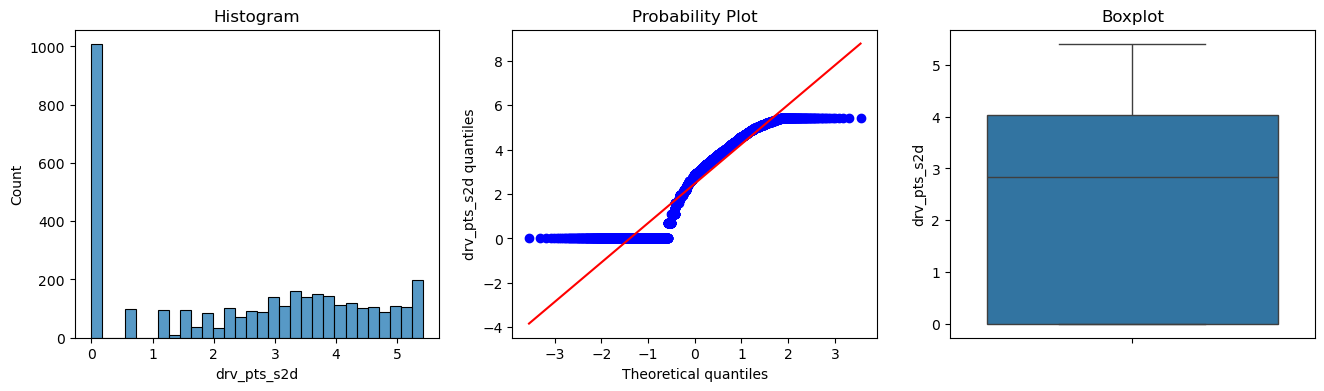

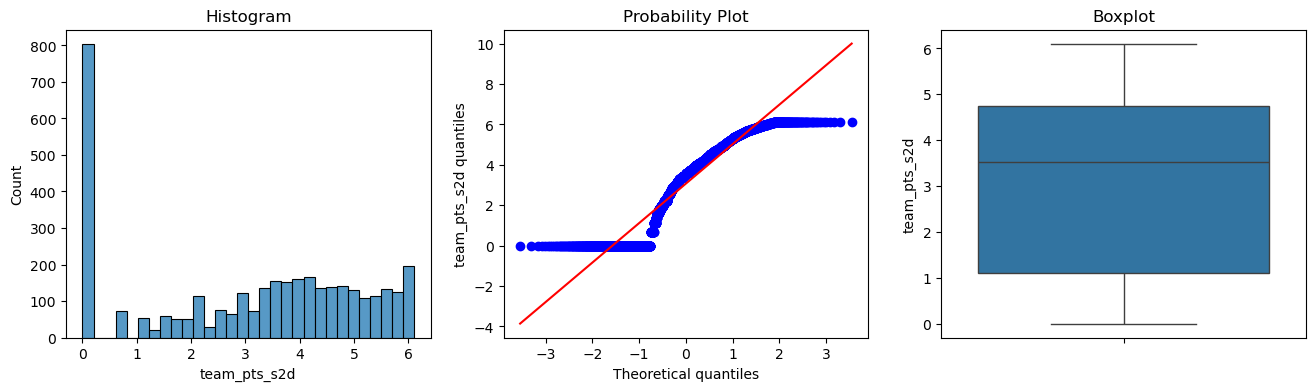

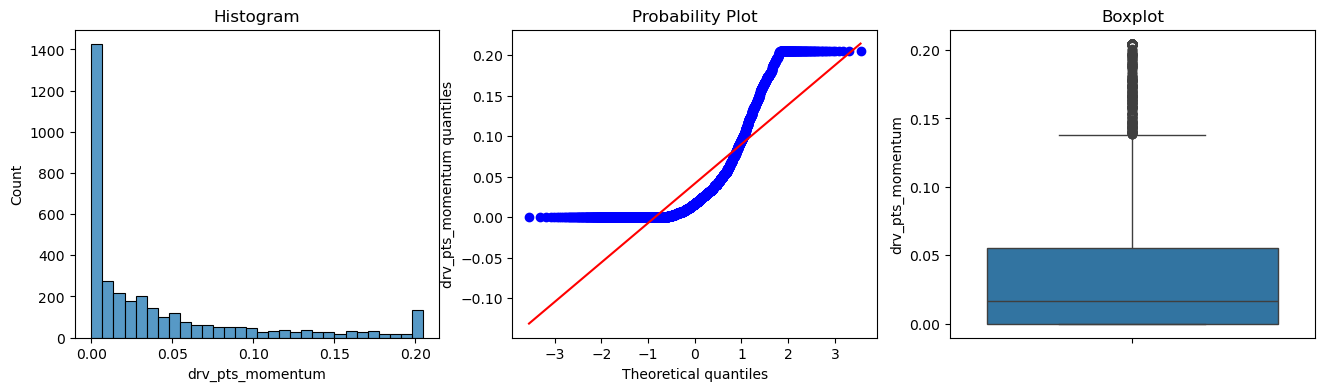

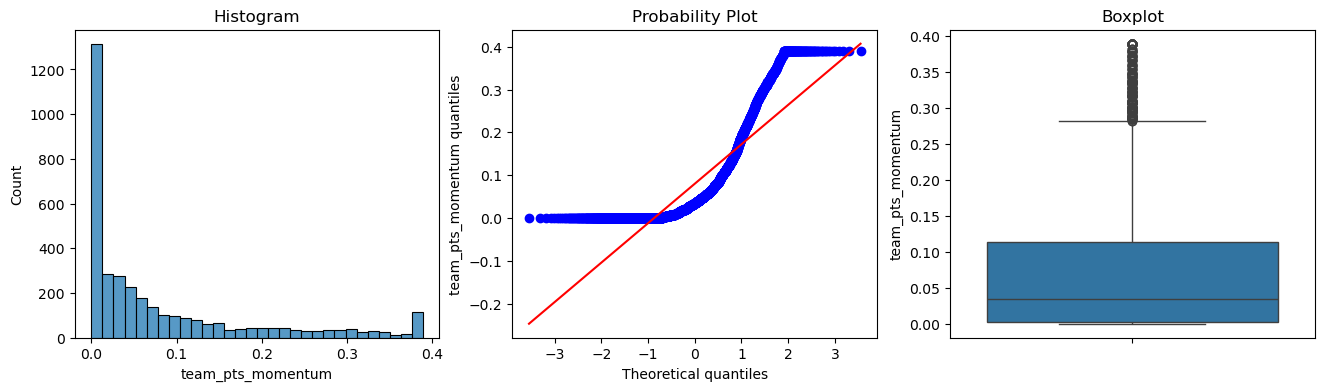

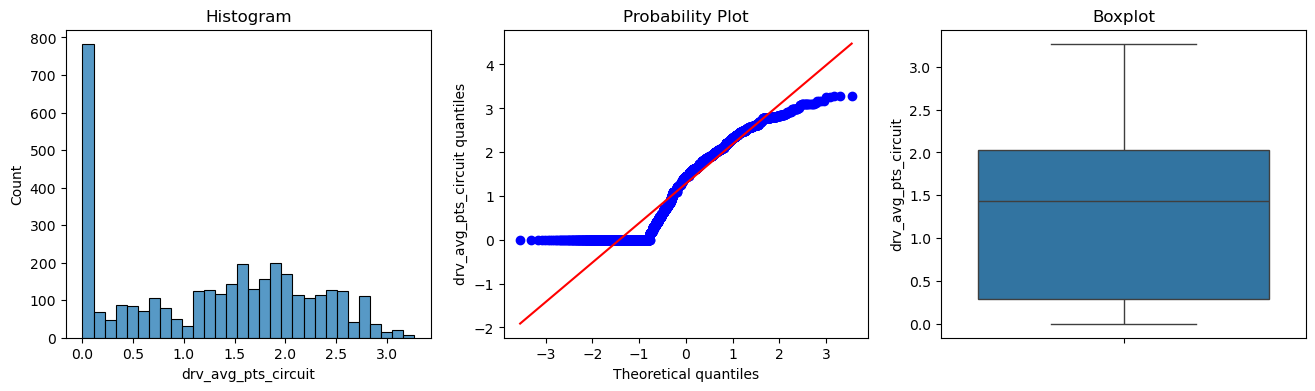

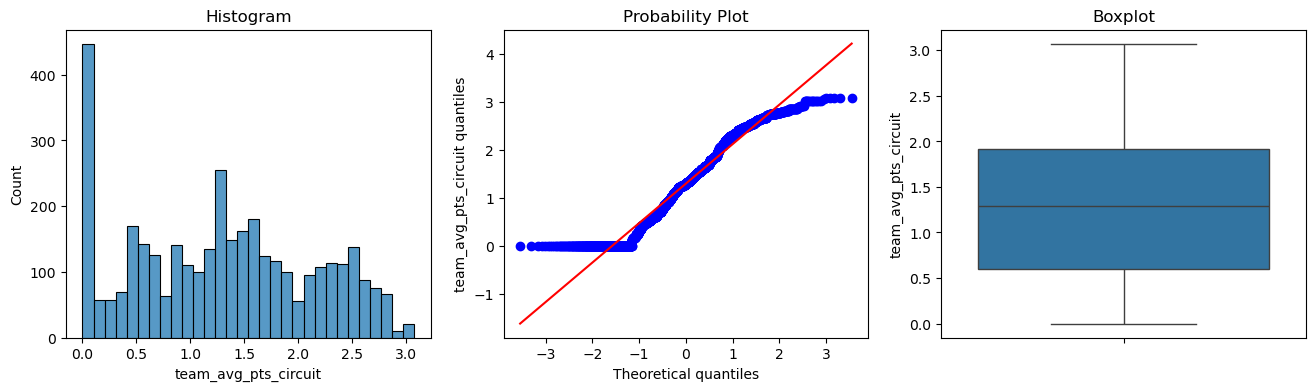

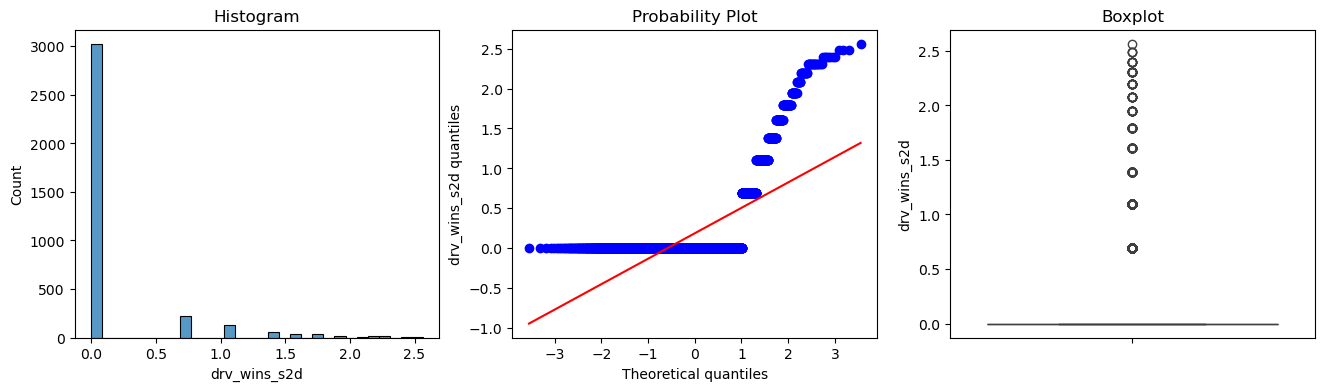

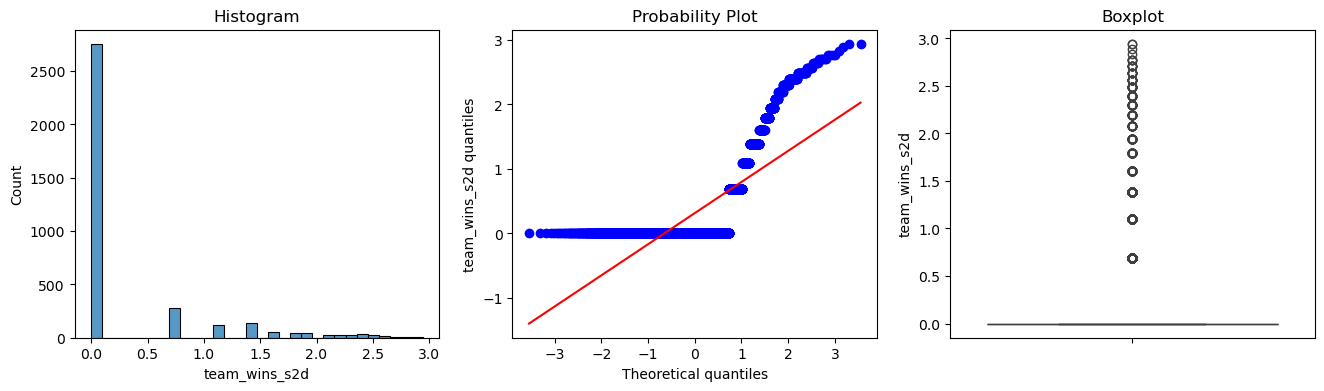

In [50]:
X_train = X_train_yjt.copy()
X_test = X_test_yjt.copy()
log_cols = [
    'drv_pts_s2d',
    'team_pts_s2d',
    'drv_pts_momentum',
    'team_pts_momentum',
    'drv_avg_pts_circuit',
    'team_avg_pts_circuit',
    'drv_wins_s2d',
    'team_wins_s2d'
]

# Apply log1p (log(x+1)) transformation
for col in log_cols:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])
    diagnostic_plots(X_train, col)

#### Binning to deal with outliers

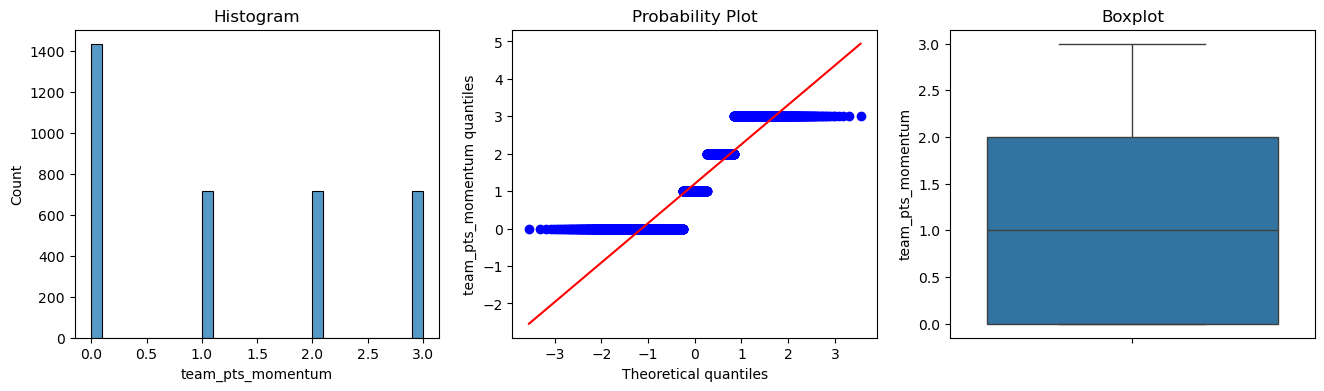

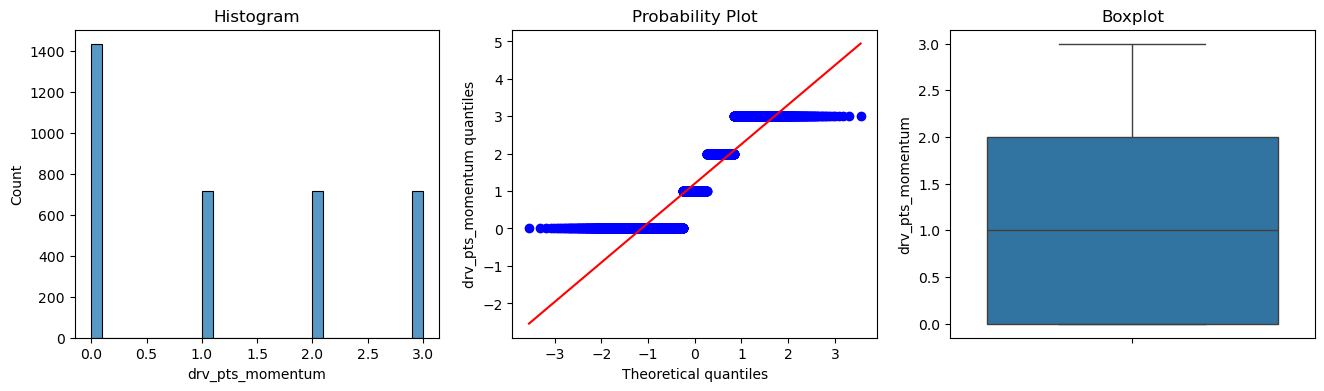

In [52]:
skewed = [
    'team_pts_momentum',
    'drv_pts_momentum',
]

for each in skewed:
    X_train[each] = pd.qcut(X_train[each], q=5, labels=False, duplicates='drop')
    diagnostic_plots(X_train, each)

for each in skewed:
     X_test[each]  = pd.qcut(X_test[each],  q=5, labels=False, duplicates='drop')

### Correlation Heatmap

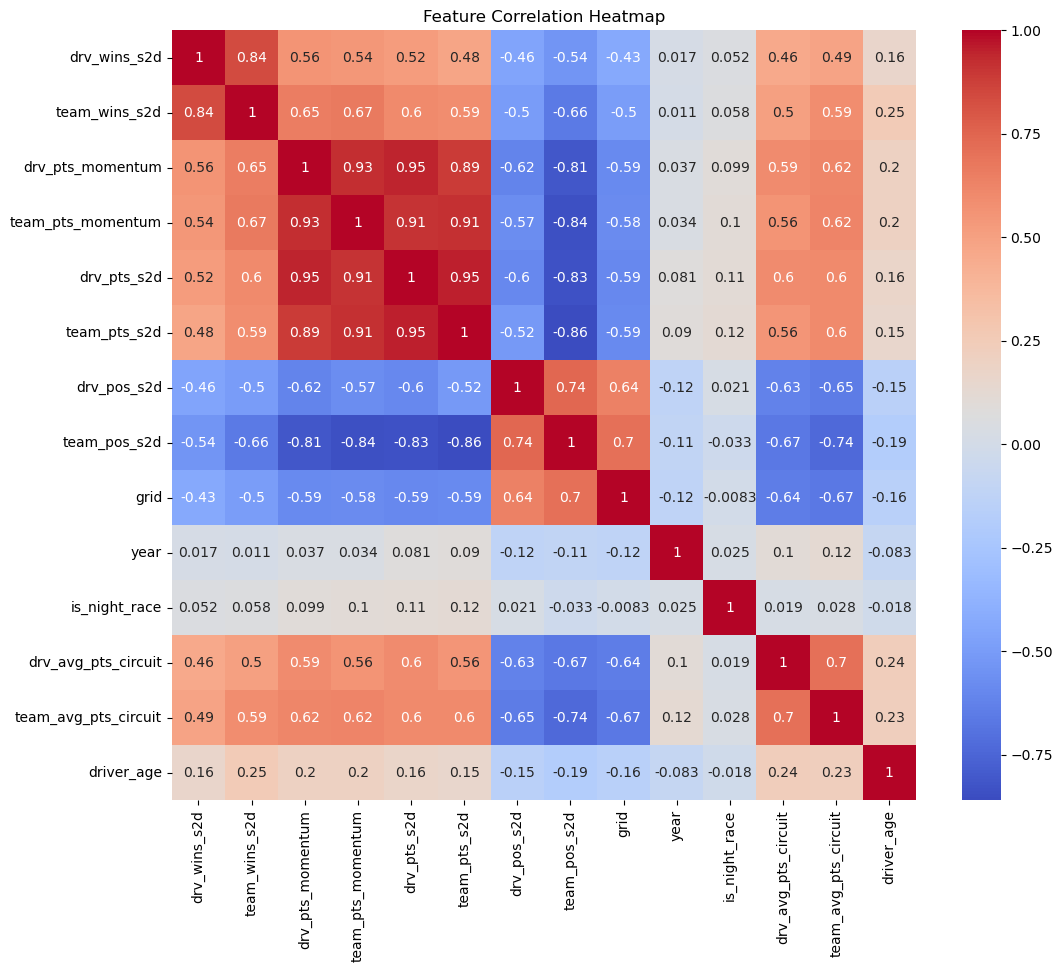

In [54]:
corr_matrix = X_train.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Dealing with Categorical Columns

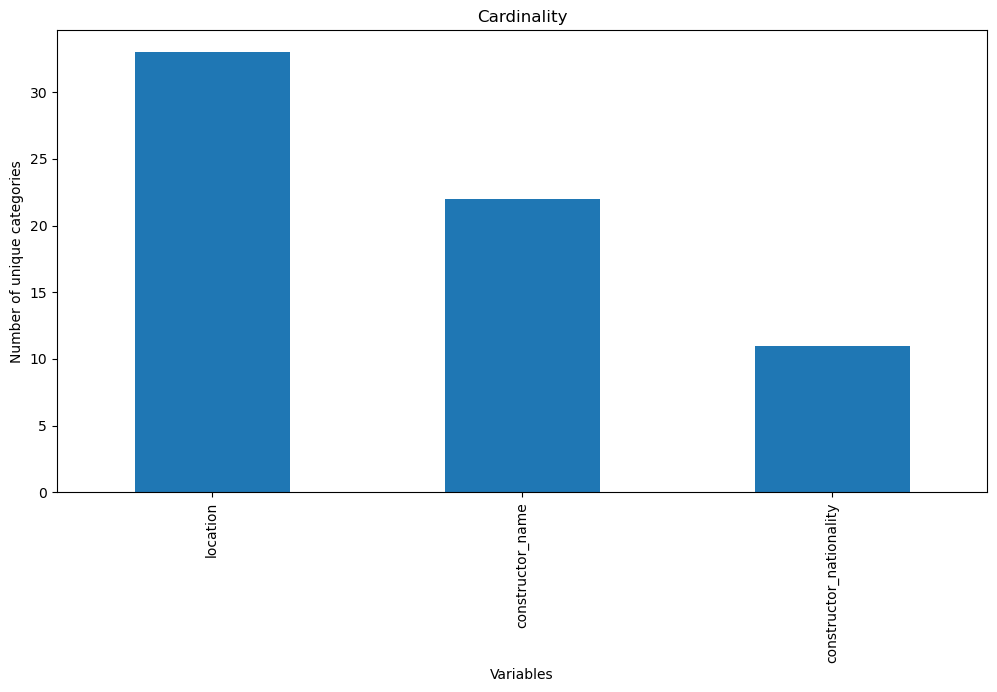

In [56]:
# X_train = X_train_cleaned
# X_test = X_test_cleaned
X_train[cat_cols].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

#### i) Leave-One-Out Encoding for High Cardinality Variables

In [58]:
import category_encoders as ce
loo_features = ['constructor_name', 'location']
loo_encoder = ce.LeaveOneOutEncoder(cols=loo_features)
X_train[loo_features] = loo_encoder.fit_transform(X_train[loo_features], y_train)
X_test[loo_features] = loo_encoder.transform(X_test[loo_features])

#### ii) One-Hot-Encoding for low Cardinatlity Variables

In [60]:
ohe_enc = OneHotEncoder(variables='constructor_nationality',drop_last=False)
ohe_enc.fit(X_train)

,top_categories,None
,drop_last,False
,drop_last_binary,False
,variables,'constructor_nationality'
,ignore_format,False


In [61]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

#### Robust Scaling to deal with Outliers

In [63]:
num_cols = [c for c in X_train.columns if X_train[c].dtypes!='O']
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

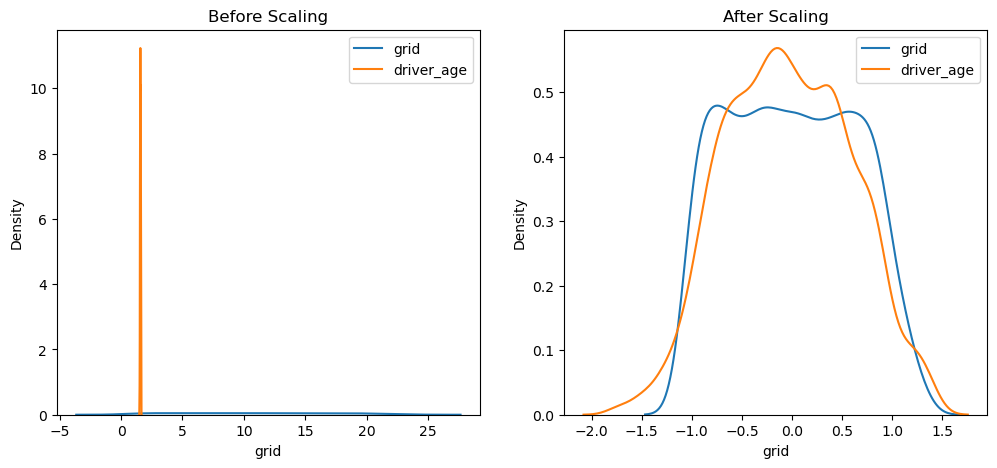

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['grid'], ax=ax1, label ='grid')
sns.kdeplot(X_train['driver_age'], ax=ax1, label ='driver_age')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['grid'], ax=ax2, label ='grid')
sns.kdeplot(X_train_scaled['driver_age'], ax=ax2, label ='driver_age')
ax2.legend()
plt.show()

## Building a naive & linear regression model

####  Size of X_train and X_test

In [67]:
print(f"Size of X_train: {X_train_scaled.shape}")
print(f"Size of X_test: {X_test_scaled.shape}")

Size of X_train: (3580, 27)
Size of X_test: (896, 27)


#### i) Naive Baseline Model Performance

In [69]:
from sklearn.metrics import r2_score
baseline_pred = np.full_like(y_test, y_train.mean(), dtype=float)

# Evaluate baseline
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = baseline_mse ** 0.5
baseline_r2 = r2_score(y_test, baseline_pred)

print("Naive Baseline Performance:")
print(f" MSE:  {baseline_mse:.4f}")
print(f" RMSE: {baseline_rmse:.4f}")
print(f" R2:   {baseline_r2:.4f}")

Naive Baseline Performance:
 MSE:  50.0379
 RMSE: 7.0738
 R2:   -0.0007


In [70]:
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

y_train_preds_naive = [round(mean_target_value,2) for row in X_train_scaled.iloc[:,0]]
print(f"The first five score for train: {y_train_preds_naive[0:5]}")

y_test_preds_naive = [round(mean_target_value,2) for row in X_test_scaled.iloc[:,0]]
print(f"The first five score for test: {y_test_preds_naive[0:5]}")

4.824720670391062
The train mean target value is 4.82.
The first five score for train: [4.82, 4.82, 4.82, 4.82, 4.82]
The first five score for test: [4.82, 4.82, 4.82, 4.82, 4.82]


In [71]:
from sklearn.metrics import root_mean_squared_error
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = root_mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = root_mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")


The Naive Baseline Model's MSE on train data is 51.13.
The Naive Baseline Model's MSE on test data is 50.04.

The Naive Baseline Model's RMSE on train data is 7.15.
The Naive Baseline Model's RMSE on test data is 7.07.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


#### ii) Linear Regresssion Model Performance

In [73]:
from sklearn.linear_model import LinearRegression

linreg_ss = LinearRegression().fit(X_train_scaled, y_train)

y_train_preds_linreg_ss = linreg_ss.predict(X_train_scaled)
y_test_preds_linreg_ss = linreg_ss.predict(X_test_scaled)

In [74]:
# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on train data is {train_mse_linreg_ss:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_mse_linreg_ss = mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's MSE on test data is {test_mse_linreg_ss:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)
# train RMSE score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_rmse_linreg_ss = root_mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's RMSE on train data is {train_rmse_linreg_ss:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_rmse_linreg_ss = root_mean_squared_error(y_true, y_pred)
print(f"The LinRegSS Model's RMSE on test data is {test_rmse_linreg_ss:.4f}.")

print()


#train R2 score
y_true = y_train
y_pred = y_train_preds_linreg_ss

train_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R2 on train data is {train_r2_linreg_ss:.4f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_linreg_ss

test_r2_linreg_ss = r2_score(y_true, y_pred)
print(f"The LinRegSS Model's R2 on test data is {test_r2_linreg_ss:.4f}.")

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

The LinRegSS Model's MSE on train data is 20.8591.
The LinRegSS Model's MSE on test data is 22.5932.

The LinRegSS Model's RMSE on train data is 4.5672.
The LinRegSS Model's RMSE on test data is 4.7532.

The LinRegSS Model's R2 on train data is 0.5921.
The LinRegSS Model's R2 on test data is 0.5482.


### Feature Importance

In [76]:
linreg_ss_importance = linreg_ss.coef_
linreg_ss_importance

array([ 2.64720048,  0.60115768, -0.25613228,  1.47514319, -0.46207595,
       -2.24073922, -0.15941764, -1.32018843, -2.81031686, -0.10675944,
       -0.46592929,  0.18192917,  3.93347505,  1.39215401, -0.28556677,
        0.40924697, -0.86885617, -0.60197077, -0.15550337, -0.33083746,
        1.81195461, -1.03701391, -1.32289667,  2.16232434, -0.21481045,
       -0.66164961,  1.21925946])

In [77]:
df_linreg_ss_feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": linreg_ss_importance
})
df_linreg_ss_feature_importance


,feature,importance
0,drv_wins_s2d,2.647200
1,team_wins_s2d,0.601158
2,drv_pts_momentum,-0.256132
3,team_pts_momentum,1.475143
4,drv_pts_s2d,-0.462076
5,team_pts_s2d,-2.240739
6,drv_pos_s2d,-0.159418
7,team_pos_s2d,-1.320188
8,grid,-2.810317
9,year,-0.106759


### Overall Performance

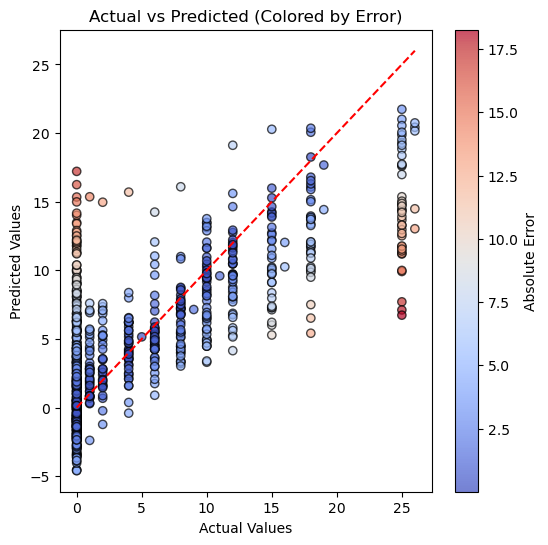

In [79]:
errors = np.abs(y_test - y_pred)

plt.figure(figsize=(6,6))
scatter = plt.scatter(
    y_test,
    y_pred,
    c=errors,                # color based on error
    cmap='coolwarm',          # color map
    alpha=0.7,
    edgecolor='k'
)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Colored by Error)")

# Colorbar to show error scale
cbar = plt.colorbar(scatter)
cbar.set_label("Absolute Error")

plt.show()

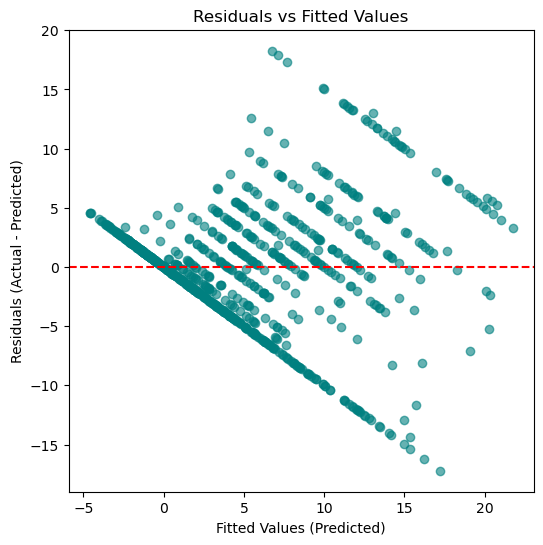

In [80]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.6, color="teal")
plt.axhline(y=0, color="red", linestyle="--")  # zero error line
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Fitted Values")
plt.show()


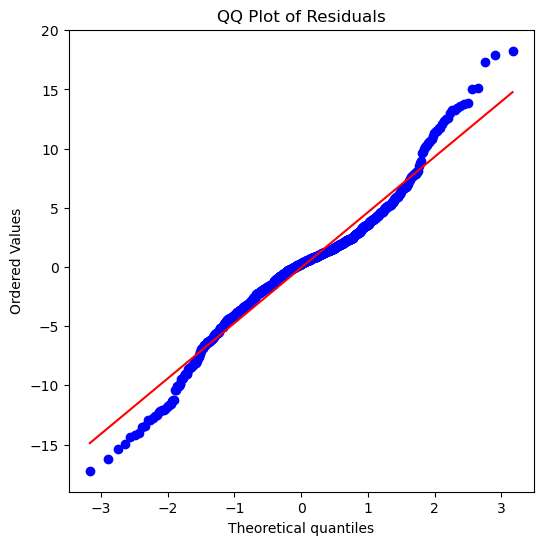

In [81]:
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

#### iii) Decision Tree Regression Model

In [83]:
tree_reg = tree.DecisionTreeRegressor(max_depth=4, random_state=2)
tree_reg.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [136]:
y_train_preds = tree_reg.predict(X_train_scaled)
y_test_preds = tree_reg.predict(X_test_scaled)
train_R2 = tree_reg.score(X_train_scaled, y_train)
test_R2 = tree_reg.score(X_test_scaled, y_test)

#Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds

train_mse = mean_squared_error(y_true, y_pred)
print(f"The Decision Tree Reg Model's MSE on train data is {train_mse:.4f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds

test_mse = mean_squared_error(y_true, y_pred)
print(f"The Decision Tree Reg Model's MSE on test data is {test_mse:.4f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)
# train RMSE score
y_true = y_train
y_pred = y_train_preds

train_rmse = root_mean_squared_error(y_true, y_pred)
print(f"The Decision Tree Reg Model's RMSE on train data is {train_rmse:.4f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds

test_rmse = root_mean_squared_error(y_true, y_pred)
print(f"The Decision Tree Reg Model's RMSE on test data is {test_rmse:.4f}.")

print()

print('training R^2 value is: ', train_R2)
print('testing R^2 value is: ', test_R2)

The Decision Tree Reg Model's MSE on train data is 17.4435.
The Decision Tree Reg Model's MSE on test data is 22.0286.

The Decision Tree Reg Model's RMSE on train data is 4.1765.
The Decision Tree Reg Model's RMSE on test data is 4.6935.

training R^2 value is:  0.6588632404513444
testing R^2 value is:  0.5594672757610442


# Data Wrangling Assignment Report

## Contents Page

1. Introduction with Value Based Problem Statement

2. Problem Formulation
   - Load and Explore the Data
   - Understand the Data
   - Formulate a Prediction Problem

3. Data Wrangling on Multiple Tables
    - Extract and Create Features from Different Tables
    - Concatenate, Merge, or Join the Tables

4. Data Cleansing and Transformation
    - Handling Missing Values and Outliers
    - Transforming & Binning Numerical Data
    - Encoding Categorical Data
    - Scaling

5. Machine Learning Model
    - Count of Rows and Columns for X_train & X_test
    - Naïve Baseline vs ML Models
    - Model Evaluation Metrics

6. Summary and Further Improvements

7. Reflection

### 1. Introduction with Value Based Problem Statement

In this assignment, I am tasked to apply what I have learned in Data Wrangling techniques into a real-world dataset, which are complex, dynamic, and influenced by many factors. Formula 1 (F1) is a pefect example of such a domain, as it is a sport where performance depends on a various factors such as driver skill, team strategy, car engineeering, and external conditions such as circuit layout. The problem I am to solve in this project is to predict the number of points a driver will score in a race, using data from 2011 season onwards. I chose 2011 as the starting point because F1 adopted its current standardized scoring system that year, which awards 25 points to the winner and points to the top ten finishers. By focusing on the modern era, it ensures that my model is not biased by historical changes in the scoring system, making predictions more consistent and meaningful. The reason for choosing points earned at the end of the race as it gives a good gauge on which finishing position they will achieved at the end of the race. For example, my machine learning model predicts that the driver will achieve 12.7, this can be interpreted as the driver will likely finishing within the top five positions. In this way, points act as a practical and standardized measure of success across different races and seasons.

This problem is important for this stakeholder:

- Performance Engineers (Main stakeholder): Accurate predictions can help them stimulate different race scenarios, optimize strategies, and better anticipate rival performance using the driver's experience. From there they can find ways on how they can improve their drivers using data-driven insights which helps to gain a better competitive edge in the upcoming race.

By building a naive, linear, and Decision Tree Regression machine learning model to predict race points, I hope to produce useful insights for my F1 stakeholder but also strengthen my own understanding of how Data Science can be applied to solve problems in sports analytics.

### 2. Problem Formulation

#### Loading and Exploring the Datset 
results = pd.read_csv("./f1db_csv_mod/results_mod.csv")
qualifying = pd.read_csv("./f1db_csv_mod/qualifying_mod.csv")
constructors = pd.read_csv("./f1db_csv_mod/constructors_mod.csv")
races = pd.read_csv("./f1db_csv_mod/races_mod.csv")
circuits = pd.read_csv("./f1db_csv_mod/circuits_mod.csv")
drivers = pd.read_csv("./f1db_csv_mod/drivers_mod.csv")
driver_standings = pd.read_csv("./f1db_csv_mod/driver_standings_mod.csv")
constructor_standings = pd.read_csv("./f1db_csv_mod/constructor_standings_mod.csv")

From here, I explored the various datasets above. I noticed that their NULL values were replaced by "\N" and data was collected ever since 1950, and the total rows was 25399. I had to understand the structure and relationships.

- results.csv - Contains the outcome of each driver in every race, including position, points earned, and whether they finished or retired.

- races.csv - Includes details of each race such as race ID, year, round, location, and date. This allows us to contextualize each result within its season and circuit.

- drivers.csv & driver_standings.csv - Holds the driver's information like nationality, date of birth, and career statistics. These features are important as it provides informaiton about their momentum and past performances, which can be predictive of future performance.

- constructors.csv & constructor_standings.csv - Provides information on teams (constructors) which includes their names and nationalities. This team data is crucial as constructor performance can influence race results.

- circuits.csv - This table provides information about the circuits where races are held. 

- qualifying.csv - This table stores information about driver's performance in the qualifying seasons.

#### Understanding the Data

- results.csv: Contains race-level outcomes (grid, position, points).

- races.csv: Provides race metadata (year, round, circuit).

- drivers.csv: Contains driver attributes (DOB, nationality).

- constructors.csv: Constructor/team details.

- driver_standings.csv & constructor_standings.csv: Season-to-date performance before each race.

#### Prediction Problem

- Target variable (y): Driver points in a race (using the current modern system).

- Features (X): Grid position, driver age, team performance, previous season-to-date points, circuit attributes, etc which will be covered later.

- Task: Regression problem (predict numeric points).

### 3. Data Wrangling on Multiple Tables

#### Concatenate, Merge or Join the tables

##### Cleaning the 'date' column in race.csv

In [ ]:
# for i, each in enumerate(races['date']):
#     parts = str(each).split("/")
#     if parts[0] == 'nan':
#         races.loc[i, 'date'] = 'nan'
#     else:
#         if len(parts[2]) == 5 and parts[2].startswith("1"):
#             parts[2] = parts[2][1:]  # Remove extra "1"
#         races.loc[i, 'date'] = "/".join(parts) 

# races["date"] = pd.to_datetime(races["date"], format="%m/%d/%Y")
# races['year'] = races['date'].dt.year

The raw races.csv has messy date strings. For example, some of the year has an extra 1 like 12011. This loop fixes the date formatting and convert it into a 'datetime' object. After cleaning, the 'year' column can be finally converted into a valid 'datetime' format.

##### Building a master dataset 'df'

In [ ]:
# df = results.merge(qualifying, on=["raceId", "driverId", "constructorId"], how="left")
# df = df.merge(races[["raceId", "circuitId", "year", "round", "date", "time"]], on="raceId", how="left")
# df = df.merge(circuits[["circuitId", "alt", "location"]], on="circuitId", how="left")
# df = df.merge(constructors[["constructorId", "nationality", "name"]], on="constructorId", how="left")
# df = df.merge(drivers[['driverId', 'dob']], on='driverId', how='left')

- results + qualifying: connects race results with starting grid position and lap times.

-  \+ races: Adds metadata about the year (year, round, date, time, circuit).

- \+ circuits: Adds track-level data such as location and altitude.

- \+ constrcutors: Adds driver's date of birth (for calculating age).

This creates a single dataset (df) that has driver, constructor, race, and circuit context all in one place.

In [ ]:
# Map each (year, round) to the previous round to get pre-race standings
# prev_round = races[['raceId','year','round']].assign(prev_round=lambda d: d['round']-1)
# prev_round = prev_round.merge(races[['raceId','year','round']].rename(columns={'raceId':'prev_raceId','round':'prev_round'}),
#                               on=['year','prev_round'], how='left').drop(columns='prev_round')

- From driver_standings, I extracted season-to-date driver points, position, and wins before this race.

- Renamed columns (drv_pos_s2d, drv_wins_s2d, drv_pts_s2d) clarify that these are cumulative before the current race.

- Merged back to the main df using both driverId and prev_raceId.

In [ ]:
# Join prev constructor standings
# cs_prev = constructor_standings[['raceId','constructorId','position','wins','points']]\
#             .rename(columns={'raceId':'prev_raceId','position':'team_pos_s2d','wins':'team_wins_s2d','points':'team_pts_s2d'})
# df = df.merge(cs_prev, on=['prev_raceId','constructorId'], how='left')

- Same ideas as for drivers, but now with constructors (teams).

#### Extract and Create features from different tables

In [ ]:
# df['drv_pts_s2d'] = pd.to_numeric(df['drv_pts_s2d'], errors='coerce')
# df['month'] = df['date'].dt.month
# df['start_hour'] = pd.to_datetime(df['time_y'], format='%H:%M:%S', errors='coerce').dt.hour
# df['is_night_race'] = df['start_hour'].apply(lambda x: 1 if x >= 18 else 0)

# Driver average points per circuit
# drv_circuit_perf = df.groupby(['driverId', 'circuitId'])['points'].mean().reset_index()
# drv_circuit_perf.rename(columns={'points': 'drv_avg_pts_circuit'}, inplace=True)

# # Team average points per circuit
# team_circuit_perf = df.groupby(['constructorId', 'circuitId'])['points'].mean().reset_index()
# team_circuit_perf.rename(columns={'points': 'team_avg_pts_circuit'}, inplace=True)

# # Merge into main dataset
# df = df.merge(drv_circuit_perf, on=['driverId', 'circuitId'], how='left')\
#        .merge(team_circuit_perf, on=['constructorId', 'circuitId'], how='left')

# df['drv_pts_momentum'] = df['drv_pts_s2d'] / df['prev_raceId']  # avg pts per race so far
# df['team_pts_momentum'] = df['team_pts_s2d'] / df['prev_raceId']
# df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
# df['driver_age'] = (df['date'] - df['dob']).dt.days // 365
# df.drop('dob', axis=1, inplace=True)
# df['alt'] = pd.to_numeric(df['alt'], errors='coerce')
# df.replace('\\N', np.nan, inplace=True)
# df.info()

- Converted drv_pts_s2d (driver’s season-to-date points) into numeric values.

- Extracted month from the race date and start hour from race time.

- Created a binary feature is_night_race: races starting at or after 18:00 were assigned as night races.

- 'drv_avg_pts_circuit' - For each driver–circuit combination, I calculated their average historical points to get their experiences on each circuit.

- 'team_avg_pts_circuit' - For each constructor–circuit combination, calculated their average historical points in each circuit. These features reflect circuit-specific performance trends.

- 'drv_avg_pts_circuit' / 'team_avg_pts_circuit'- I have calculatd their average historical points for both drivers and constructors respectively. These features have reflected circuit-specific performance trends.

- 'drv_pts_momentum' / 'team_pts_momentum' - Their season-to-date points divided by number of races completed so far. These features reflected form and consistency across the season.

- Converted driver’s date of birth into a datetime object.

- Calculated driver’s age at the time of each race (in years).

- Dropped the raw dob column since it is no longer needed.

- Converted circuit altitude (alt) to numeric values.

- Replaced invalid placeholders (\N) with NaN.

#### Renaming and Dropping Columns

In [ ]:
# df['constructor_name'] = df['name']
# df['constructor_nationality'] = df['nationality']
# df = df.drop(columns=['resultId', 
#                       'raceId', 
#                       'driverId', 
#                       'constructorId',
#                       'statusId',
#                       'qualifyId',
#                       'circuitId',
#                       'number_x' ,
#                       'position_x', 
#                       'positionText', 
#                       'positionOrder',
#                       'laps',
#                       'time_x',
#                       'milliseconds',
#                       'fastestLap',
#                       'fastestLapTime',
#                       'fastestLapSpeed',
#                       'number_y',
#                       'position_y',
#                       'q1',
#                       'q2',
#                       'q3',
#                       'date',
#                       'time_y',
#                       'nationality',
#                       'name',
#                       'prev_raceId',
#                       'rank',
#                       'start_hour',
#                       'alt',
#                       'round',
#                       'month'
#                      ])

# # Keep only races from 2011 onwards
# df_modern = df[df['year'] >= 2011].copy()

# print(f"Original dataset size: {df.shape[0]}")
# print(f"Modern era dataset size: {df_modern.shape[0]}")

# points_col = df_modern.pop('points')  # Removes and stores the column
# df_modern['points'] = points_col
# df = df_modern

- Renamed 'name' and 'nationality' to 'constructor_name' and 'constructor_nationality' respectively for clarity.

- I dropped those columns as they are irrelevant or they introduce more noise to the machine learning model.

- I filtered out rows which dates back to 2011 onwards as those are the rows that I need since it uses the current score system.

- Shifted points to the most right as it is my target column.

### 4. Data Cleansing and Transformation

#### Train-test split

In [ ]:
# y = df["points"]
# df = df.drop(columns=['points'])
# X = df.copy()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# X_train.shape, X_test.shape

My test size is 0.2 as I think the dataset is large enough and I want the model to generalize well in the testing set. My random state=15 is for reproducibility.

#### Checking for missing values
Sum of NULL values for each row:

grid                         0 \
year                         0 \
location                     0 \
drv_pos_s2d                359 \
drv_wins_s2d               359 \
drv_pts_s2d                367 \
team_pos_s2d               342 \
team_wins_s2d              342 \
team_pts_s2d               342 \
is_night_race                0 \
drv_avg_pts_circuit          0 \
team_avg_pts_circuit         0 \
drv_pts_momentum           367 \
team_pts_momentum          342 \
driver_age                   0 \
constructor_name             0 \
constructor_nationality      0 \
points                       0 

#### Filling in Missing Values

In [ ]:
# num_zero_cols = ['drv_wins_s2d', 'team_wins_s2d', 'drv_pts_momentum', 'team_pts_momentum', 'drv_pts_s2d', 'team_pts_s2d']
# ordinal_cols = ['drv_pos_s2d', 'team_pos_s2d']


# num_median_imputer = Pipeline([('imputer', SimpleImputer(strategy='median'))])
# num_zero_imputer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0))])
# ordinal_imputer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent'))])


# preprocessor = ColumnTransformer([
#     ('num_zero', num_zero_imputer, num_zero_cols),
#     ('ordinal', ordinal_imputer, ordinal_cols),
# ], remainder='passthrough')

# preprocessor.fit(X_train)

# X_train_transformed = preprocessor.transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

# imputed_cols = num_zero_cols + ordinal_cols 

# # 2. Columns that were passed through (remainder='passthrough')
# pass_through_cols = [col for col in X_train.columns if col not in imputed_cols]

# # 3. Combine them
# final_cols = imputed_cols + pass_through_cols

# # Convert back to DataFrame
# X_train = pd.DataFrame(X_train_transformed, columns=final_cols, index=X_train.index)
# X_test = pd.DataFrame(X_test_transformed, columns=final_cols, index=X_test.index)
# for each in num_cols:
#     X_train[each] = pd.to_numeric(X_train[each], errors='coerce')
#     X_test[each] = pd.to_numeric(X_test[each], errors='coerce')

- 'num_zero_cols' - Numerical features where missing values should be filled with 0. It would make sense to fill up with 0 if a driver or a team did not win any races. 

- 'ordinal_cols' - Ordinal features where missing values should be filled with the most frequent value (mode). This is because Driver standings position is an ordinal ranking so imputing with mode preserves the interpreability.

- After transformation, I turned it back to a pandas Dataframe and reconstruct the column order. I also ensured that the transformation is properly converted back to numeric.

#### Outlier Capping

After plotting the dignostic plot for each of the numerical columns. I deal with the outers using **Winsorization** to deal with outliers.

In [ ]:
# outliers = [
#     'drv_pts_s2d',
#     'team_pos_s2d',
#     'team_pts_s2d',
#     'drv_avg_pts_circuit',
#     'team_avg_pts_circuit',
#     'team_pts_momentum', 
#     'drv_pts_momentum'
# ]
# windsorizer = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
#                           tail='right', # cap left, right or both tails 
#                           fold=3,
#                           variables=outliers)

# windsorizer.fit(X_train)

# winsorizer = Winsorizer(
#     capping_method='gaussian',
#     tail='both',
#     fold=3, 
#     variables=['drv_wins_s2d', 'team_wins_s2d']
# )

# windsorizer.fit(X_train)
# X_train = windsorizer.transform(X_train)
# X_test = windsorizer.transform(X_test)
# diagnostic_plots(X_train, 'drv_wins_s2d')
# diagnostic_plots(X_train, 'team_wins_s2d')

The columns above shown to have outliers and I chose IQR as all of them are right skewed. I chose right tail as most of the columns shown to haev outliers beyond the right tail mark.

#### Data Transformation

i) Yeo-Johnson

I applied Yeo-Johnson on 'driver_age' as I want to make the data more normally distributed

ii) Log Transformation

log_cols = [
    'drv_pts_s2d',
    'team_pts_s2d',
    'drv_pts_momentum',
    'team_pts_momentum',
    'drv_avg_pts_circuit',
    'team_avg_pts_circuit',
    'drv_wins_s2d',
    'team_wins_s2d'
]

I applied Log transformation on these columns as they are shown to be right-skewed. Log transformation is good in dealing numerical variables that are right-skewed.

#### Binning

skewed = [
    'team_pts_momentum',
    'drv_pts_momentum',
]

for each in skewed: \
    X_train[each] = pd.qcut(X_train[each], q=5, labels=False, duplicates='drop') \
    diagnostic_plots(X_train, each)

These columns still had outliers so I did binning. I chose 5 as it is a good balance as it would not lose so much details.


#### Correlation Heatmap

In this part, I find features that are multi-collinear with each other. That would mean removing them if they are above 0.8 and -0.8 in the scale. I have removed 'months' as it shown to be related with 'round'. However, there are some columns are related with each other but I chose not to remove them as features such as 'drv_wins_s2d', 'team_wins_s2d', 'drv_pts_momentum', 'team_pts_momentum' play an important role in affecting how much points would a driver earned at the end of the race as it factors in drivers and constructors experiences.

#### Encoding Methods for Categorical Varivables

i) Leave-One-Out Encoding for High Cardinality Variables

loo_features = ['constructor_name', 'location']

After plotting the number of unique values for each of the categorical variables in a bar chart, 'constructor_name' (30) and 'location' (20+) shown to have high number of unique variables. The reason why I chose LOO Encoding as it replaces each category with the mean target value. However, in each row, the category's mean is computed excluding that row's target value. This prevents target leakage and reduces bias and overfitting.

ii) One-Hot-Encoding for low-cardinality Variables

ohe_enc = OneHotEncoder(variables='constructor_nationality',drop_last=False) \
ohe_enc.fit(X_train)

I used OHE for 'constructor_nationality' as it has low cardinality. 

#### Robust Scaling

I used robust scaling on all of the numerical columns as it helps to deal with outliers.

### 5. Machine Learning Model

#### Size of X_train and X_test

Size of X_train: (3580, 27) \
Size of X_test: (896, 27)

i) Naive Baseline Model Performance
MSE  = 50.0379 \
RMSE = 7.0738 \
R2   = -0.0007 

1. RMSE

On average, the baseline’s prediction is ~7 points off from the actual value. Given that the F1 points scale ranges from 0 to 25 points per race, this is quite a large error. It shows that simply predicting the mean does not capture the variability in results.

2. R2

R² compares your model to just predicting the mean. My R2 is negative so my baseline is no better than chance. 

From the scores shown above, my naive baseline is weak as it does not capture differences in drivers, constructors, or track characteristics as it just predicts the mean for everyone. However, this sets as a reference point for my machine learning models.

ii) Linear Regression Model

Train MSE: 20.86 | RMSE: 4.57 | R²: 0.5921 \
Test MSE: 22.59 | RMSE: 4.75 | R²: 0.5482

1. RMSE


RMSE dropped from 7.07 → ~4.75 on the test set.
This means the model is now predicting within ~4.75 points on average, which is much closer to reality than always guessing the mean.

2. R2

Train R² = 0.5921 vs Test R² = 0.5482 \
The scores are close → the model is not overfitting badly. It generalizes decently to unseen data.

iii) Decision Tree Regression Model

Train MSE: 17.44 | RMSE: 4.18 | R²: 0.659 \
Test MSE: 22.03 | RMSE: 4.69 | R²: 0.559

1. RMSE

RMSE drops from 7.07 → ~4.7 for both.

2. R2

Train R² = 0.66 (better than Linear Regression’s 0.59). But the test R² = 0.56 is only slightly better than Linear Regression’s 0.55. This suggests the Decision Tree captures some non-linear patterns, but is also slightly overfitting (the train–test gap is bigger).

### 6. Summary and Further Improvements

I did the whole process multiple times to further improve and experiment more ways such as removign features, transforming and encoding data. These are the features that I have dropped as they are shown to have little or no importance
- 'month'
- 'start_hour'
- 'is_night_race'
- 'alt'

Model Performance:

1. Naive Baseline:

MSE: 50.04, RMSE: 7.07, R²: ≈ 0.0 \
This model simply predicts the average outcome for all drivers. Its poor performance confirms that more advanced models are necessary.

2. Linear Regression:


Train R² = 0.592, Test R² = 0.548 \
RMSE ≈ 4.75 on test data. \
Shows improvement over baseline, capturing nearly 55% of the variance in race points

3. Decision Tree Regressor:

Train R² = 0.659, Test R² = 0.559 \
RMSE ≈ 4.69 on test data. \
Slightly stronger than Linear Regression on test performance, but at risk of overfitting.

#### Feature Importance Findings

1. 'drv_avg_pts_circuit' - The most influential predictor. This reflects that drivers often perform consistently at specific tracks, making it a strong indicator of future results.

2. 'grid' - This has a strong negative weight which confirms that starting closer to the front significantly improves the chances of scoring points.

3. Constructor nationality - This acted as a proxy for powerful teams in specific eras, highlighting the impact of  team identity.

4. drv_pts_momentum & team_pts_momentum - Mixed but useful signals of form of consistency from driver's and teams.

These insights are valuable to my stakeholder as they can benchmark performance against historical circuit average to identify anomalies. They should also focus on how they can get a better starting position and measure whether the current performance is trending upwards or downwards and adjust development decisions mid-season.

##### Summary

The models show that the driver consistency at circuits, grid position, and constructors are key predictors of race points. Performance engineers should be focusing on these attributes so that their drivers can stand a better chancer in securing a better finish or potentially a podium. However, my stakeholder should not be focused on what the model's predictions to decide the results/outcome on the race's day. Rather than focusing on the score they might potentially achieve, they should focus on those attributes which are deem key predictors in achieving a higher score in the models.

#### Further Improvements

I think having a larger dataset would improve the overall score of the models. This is because I only filtered out data from 2011 onwards and I left out data all the way to 1950. I would like to find different ways to encode my categorical variables.

### 7. Reflection

Throughout the Data Wrangling module, I learned how to merge, clean, create new features, transform, and integrate datasets effectively to prepare them for analysis. Working on this F1 dataset to predict the driver's points earned at the end of the race taught me how important the Data Understanding and Data Preparation in the CRISP-DM (Cross-Industry Standard Process for Data Mining) Framework. Understanding the data and whether it is helpful to what my stakeholder need is important. It taught me to identify missing values, inconsistencies, outliers, and irrelevant features. Without understanding the data, any model built may produce misleading results. Moreover, accurate and well-structured data enables reliable predictions. Skills such as handling missing values, encoding categorical variables, and joining multiple tables proved useful and directly affect the performance of machine learning models. These tasks were challenging at first, but they highlighted how messy real-world data can be. It also taught me that there is no textbook way of cleaning and transforming data. This module taught me that I should never be afraid of experimenting around different ways to handle data and there is no correct way. However, this part was the most time-consuming as my code sometimes run into errors and I must find out how I can fix it. Moreover, even after I built the models, I still must go back and find ways to transform the dataset as my linear regression model is not generalizing well to the dataset. 

I also learned that feature engineering is an integral part of data wrangling. Creating new features or transforming existing ones can reveal hidden patterns and improve predictive performance. For this dataset, I calculated variables such as driver's pervious race performance, constructors’ points momentum to consider drivers and constructors experiences. This step showed me that data wrangling is not just a preparatory task but a creative and analytical process on its own where I need to understand insights and domain knowledge.

This module has made me more realize that the skills I learned are applicable to other modules I have learned in Data Science. Data Wrangling is not limited to Formula 1 datasets but relevant to any project involving data. In Machine Learning, I have applied what I learned in this module and applied it in the ML's assignment 1 as another way to improve my model's performance is not just found in hyper tuning, but also the way I clean and transform the dataset. Clean and well-structured data is essential for training robust models. In Data Distributed Pipelines, proper data preparation allows for flow of data and ensures that analytical results remain consistent and reliable across large, distributed datasets. Overall, Data Wrangling helped me see the interconnectedness of these skills across various modules. 

What surprised me the most was how time consuming the data preparation part would be. I thought improving and hyper tuning the part took up a lot of time in my ML assignment, I never thought that small changes to transformation, cleaning, dropping columns, encoding would influence the results of my regression models. Initially, I have underestimated how much steps needed for to prepare the dataset and have found it tedious. However, I find it fun to experiment around different ways to create new columns, clean, and transform the dataset. Every step, from basic cleaning to feature engineering, has the potential to significantly improve or undermine the insights derived from the data.

If I were to redo the assignment, I would allocate more time to exploratory data analysis (EDA) and feature engineering, as these steps can uncover hidden patterns and relationships that might not be immediately obvious. By putting additional effort into understanding how different features interact and how they affect my machine learning results, I could improve model accuracy and gain more insightful conclusions. Additionally, I would experiment with handling outliers and transforming skewed variables to see if these steps could further enhance model performance.

I would want to be more exposed to large and messy datasets when I am free. These opportunities will help to stimulate real-world data issues, such as inconsistent formats, missing values, or multiple sources with conflicting information. Not only that, but it will also strengthen my data wrangling skills and foundation in handling diverse datasets.

In conclusion, this DW module helped me to see the importance of data quality in any analytical workflow. It has shown me that understanding and preparing data is not just any other step but a critical one that bridges raw information and actionable insights. The knowledge and skills I have gained will help me to better prepare myself in the workforce. As I was tasked with many assignments in this short time, I was forced to put in an uncomfortable situation where I have to learn how to manage my time and find so many ways to improve my data preparation/machine learning models. I feel more confident in my ability to transform raw data into meaningful predictions and insights that can drive informed decision-making.
